In [156]:
from selenium import webdriver
#from BeautifulSoup import BeautifulSoup

from bs4 import BeautifulSoup
import pandas as pd
import requests

import datetime 
from datetime import datetime


In [150]:
URL = "https://bina.az/baki/alqi-satqi/menziller/yeni-tikili/2-otaqli?items_view=list"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [151]:
results = soup.find(id="js-items-search")

In [152]:
#print(results.prettify())

In [7]:
job_elements = results.find_all("div", class_="card_params")

In [2]:
#for job_element in job_elements:
   # print(job_element, end="\n"*2)

In [9]:
prices=[] #List to store name of the product
locations=[] #List to store price of the product
names=[] #List to store rating of the product
dates_posted=[] 


for job_element in job_elements:
    
    name = job_element.find("ul", class_="name")
    location = job_element.find(class_="location")
    price = job_element.find("span", class_="price-val")
    date_posted = job_element.find(class_="city_when")
    
    names.append(name.text)
    locations.append(location.text)
    prices.append(price.text)
    dates_posted.append(date_posted.text)
    

In [12]:
df = pd.DataFrame({'Name': names, 'Price':prices,'Location':locations, 'Date':dates_posted, 'Today': datetime.today().
                   strftime('%m/%d/%Y')}) 

In [13]:
df

,Name,Price,Location,Date,Today
0,2 otaqlı64 m²3/19 mərtəbə,82 000,Əhmədli m.,"Bakı, 07 i̇yun 2022",06/14/2022
1,2 otaqlı70.2 m²8/14 mərtəbə,119 340,Nərimanov r.,"Bakı, 04 i̇yun 2022",06/14/2022
2,2 otaqlı63 m²11/16 mərtəbə,80 000,Əhmədli m.,"Bakı, dünən 15:48",06/14/2022
3,2 otaqlı80.4 m²9/16 mərtəbə,100 500,7-ci mikrorayon q.,"Bakı, dünən 15:16",06/14/2022
4,2 otaqlı74.3 m²,104 777,Yasamal r.,"Bakı, 31 may 2022",06/14/2022
5,2 otaqlı73.7 m²,180 638,Bakı,"Bakı, 09 i̇yun 2022",06/14/2022
6,2 otaqlı65.2 m²,260 474,Sea Breeze,"Bakı, dünən 14:47",06/14/2022
7,2 otaqlı102.5 m²,184 428,Gənclik m.,"Bakı, 13 i̇yun 2022",06/14/2022
8,2 otaqlı68 m²10/14 mərtəbə,113 500,Həzi Aslanov m.,"Bakı, bugün 01:26",06/14/2022
9,2 otaqlı91 m²4/18 mərtəbə,191 000,Nizami m.,"Bakı, bugün 00:53",06/14/2022


In [14]:
df['num_rooms'] = df['Name'].str.split('otaqlı', 1, expand=True)[0]

df['size'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[0]

df['floor'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[1].\
str.split('mərtəbə', 1, expand=True)[0]


In [16]:
df_1 = df[['num_rooms', 'size', 'floor', 'Price', 'Location', 'Date', 'Today']]

In [17]:
df_1

,num_rooms,size,floor,Price,Location,Date,Today
0,2,64,3/19,82 000,Əhmədli m.,"Bakı, 07 i̇yun 2022",06/14/2022
1,2,70.2,8/14,119 340,Nərimanov r.,"Bakı, 04 i̇yun 2022",06/14/2022
2,2,63,11/16,80 000,Əhmədli m.,"Bakı, dünən 15:48",06/14/2022
3,2,80.4,9/16,100 500,7-ci mikrorayon q.,"Bakı, dünən 15:16",06/14/2022
4,2,74.3,,104 777,Yasamal r.,"Bakı, 31 may 2022",06/14/2022
5,2,73.7,,180 638,Bakı,"Bakı, 09 i̇yun 2022",06/14/2022
6,2,65.2,,260 474,Sea Breeze,"Bakı, dünən 14:47",06/14/2022
7,2,102.5,,184 428,Gənclik m.,"Bakı, 13 i̇yun 2022",06/14/2022
8,2,68,10/14,113 500,Həzi Aslanov m.,"Bakı, bugün 01:26",06/14/2022
9,2,91,4/18,191 000,Nizami m.,"Bakı, bugün 00:53",06/14/2022


# for multipe pages

In [19]:
pip install lxml
pip install html5lib
import lxml

  Using cached lxml-4.9.0.tar.gz (3.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.9.0-cp36-cp36m-macosx_10_6_intel.whl size=3035456 sha256=e1265edf436e59df79104bb8ff4999b6f3780e928aaa8ac31ea3ad6688afbf74
  Stored in directory: /Users/faridmammadaliyev/Library/Caches/pip/wheels/fe/c7/c1/7bd21552d62c16fe43842f719bd114ebe81f88ee818256519a
Successfully built lxml
Note: you may need to restart the kernel to use updated packages.


## write a loop for multiple pages

In [68]:

page = 1
prices=[] #List to store name of the product
locations=[] #List to store price of the product
names=[] #List to store rating of the product
dates_posted=[] 

while page != 2000:
    
    url = f"https://bina.az/baki/alqi-satqi/menziller?page={page}"
    page_main = requests.get(url)
    soup = BeautifulSoup(page_main.content, "html.parser")

    results = soup.find(id="js-items-search")
    job_elements = results.find_all("div", class_="card_params")

    for job_element in job_elements:
        
        name = job_element.find("ul", class_="name")
        location = job_element.find(class_="location")
        price = job_element.find("span", class_="price-val")
        date_posted = job_element.find(class_="city_when")
    
        names.append(name.text)
        locations.append(location.text)
        prices.append(price.text)
        dates_posted.append(date_posted.text)
    
    page = page + 1
    
    

In [71]:
df = pd.DataFrame({'Name': names, 'Price':prices,'Location':locations, 'Date':dates_posted, 'Today': datetime.today().
                   strftime('%m/%d/%Y')}) 

In [72]:
df

,Name,Price,Location,Date,Today
0,2 otaqlı108 m²16/19 mərtəbə,138 000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022
1,3 otaqlı103 m²5/9 mərtəbə,143 156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022
2,2 otaqlı48 m²3/5 mərtəbə,110 000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022
3,3 otaqlı108.1 m²12/13 mərtəbə,153 500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022
4,4 otaqlı167.6 m²,251 400,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022
...,...,...,...,...,...
37595,2 otaqlı90 m²19/21 mərtəbə,110 000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022
37596,3 otaqlı163 m²9/17 mərtəbə,309 000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022
37597,2 otaqlı110 m²11/17 mərtəbə,180 000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022
37598,4 otaqlı90 m²8/9 mərtəbə,168 000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022


In [73]:
df['num_rooms'] = df['Name'].str.split('otaqlı', 1, expand=True)[0]

df['size'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[0]

df['floor'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[1].\
str.split('mərtəbə', 1, expand=True)[0]


In [74]:
df_1 = df[['num_rooms', 'size', 'floor', 'Price', 'Location', 'Date', 'Today']]

In [75]:
df_1

,num_rooms,size,floor,Price,Location,Date,Today
0,2,108,16/19,138 000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022
1,3,103,5/9,143 156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022
2,2,48,3/5,110 000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022
3,3,108.1,12/13,153 500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022
4,4,167.6,,251 400,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022
...,...,...,...,...,...,...,...
37595,2,90,19/21,110 000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022
37596,3,163,9/17,309 000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022
37597,2,110,11/17,180 000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022
37598,4,90,8/9,168 000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022


In [76]:
df.to_csv('houses_baku.csv', index=False, encoding='utf-8')

In [2]:
df = pd.read_csv('houses_baku.csv')

In [4]:
df['num_rooms'] = df['Name'].str.split('otaqlı', 1, expand=True)[0]

df['size'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[0]

df['floor'] = df['Name'].str.split('otaqlı', 1, expand=True)[1].str.split('m²', 1, expand=True)[1].\
str.split('mərtəbə', 1, expand=True)[0]

In [5]:
df_1 = df[['num_rooms', 'size', 'floor', 'Price', 'Location', 'Date', 'Today']]

In [6]:
df_1

,num_rooms,size,floor,Price,Location,Date,Today
0,2,108,16/19,138 000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022
1,3,103,5/9,143 156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022
2,2,48,3/5,110 000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022
3,3,108.1,12/13,153 500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022
4,4,167.6,,251 400,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022
...,...,...,...,...,...,...,...
37595,2,90,19/21,110 000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022
37596,3,163,9/17,309 000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022
37597,2,110,11/17,180 000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022
37598,4,90,8/9,168 000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022


In [7]:
df_1.to_csv('houses_baku_parsered.csv', index=False, encoding='utf-8')

In [1]:
import pandas as pd

df_1 = pd.read_csv('houses_baku_parsered.csv')

In [2]:
df_1

,num_rooms,size,floor,Price,Location,Date,Today
0,2,108.0,16/19,138 000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022
1,3,103.0,5/9,143 156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022
2,2,48.0,3/5,110 000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022
3,3,108.1,12/13,153 500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022
4,4,167.6,NaN,251 400,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022
...,...,...,...,...,...,...,...
37595,2,90.0,19/21,110 000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022
37596,3,163.0,9/17,309 000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022
37597,2,110.0,11/17,180 000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022
37598,4,90.0,8/9,168 000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022


In [3]:
df_1['Price'] = df_1['Price'].str.replace(' ', '').astype(int)

In [4]:
df_1.dtypes

num_rooms      int64
size         float64
floor         object
Price          int64
Location      object
Date          object
Today         object
dtype: object

In [5]:
df_1.describe()

,num_rooms,size,Price
count,37600.000000,37600.000000,3.760000e+04
mean,2.785691,114.175072,2.019396e+05
std,1.051850,852.950803,1.887489e+05
min,1.000000,3.000000,1.500000e+03
25%,2.000000,69.000000,1.100000e+05
50%,3.000000,97.000000,1.550000e+05
75%,3.000000,135.000000,2.399990e+05
max,20.000000,165000.000000,5.000000e+06


In [6]:
# if you are using pandas and would like to suppress scientific notation for all floats, is to adjust the pandas options.




pd.options.display.float_format = '{:.2f}'.format



In [7]:
df_1.describe()

,num_rooms,size,Price
count,37600.00,37600.00,37600.00
mean,2.79,114.18,201939.58
std,1.05,852.95,188748.93
min,1.00,3.00,1500.00
25%,2.00,69.00,110000.00
50%,3.00,97.00,155000.00
75%,3.00,135.00,239999.00
max,20.00,165000.00,5000000.00


In [8]:
df_1['floor_current'] = df_1['floor'].str.split('/', 1, expand=True)[0]

In [9]:
df_1['floor_max'] = df_1['floor'].str.split('/', 1, expand=True)[1]

In [10]:
df_1['floor_current'] = df_1['floor_current'][pd.notnull(df_1['floor_current'])].astype('int')

In [11]:
df_1['floor_max'] = df_1['floor_max'][pd.notnull(df_1['floor_max'])].astype('int')

In [12]:
df_1.dtypes

num_rooms          int64
size             float64
floor             object
Price              int64
Location          object
Date              object
Today             object
floor_current    float64
floor_max        float64
dtype: object

In [13]:
df_1['floor_ratio'] = df_1['floor_current']/df_1['floor_max'] 

In [14]:
df_1.columns

Index(['num_rooms', 'size', 'floor', 'Price', 'Location', 'Date', 'Today',
       'floor_current', 'floor_max', 'floor_ratio'],
      dtype='object')

In [15]:
df_1[['num_rooms', 'size', 'floor_ratio',  'Location', 'Date', 'Today', 'floor', 'floor_current', 'floor_max'
     , 'Price']]



,num_rooms,size,floor_ratio,Location,Date,Today,floor,floor_current,floor_max,Price
0,2,108.00,0.84,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022,16/19,16.00,19.00,138000
1,3,103.00,0.56,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022,5/9,5.00,9.00,143156
2,2,48.00,0.60,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022,3/5,3.00,5.00,110000
3,3,108.10,0.92,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022,12/13,12.00,13.00,153500
4,4,167.60,nan,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022,NaN,nan,nan,251400
...,...,...,...,...,...,...,...,...,...,...
37595,2,90.00,0.90,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022,19/21,19.00,21.00,110000
37596,3,163.00,0.53,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022,9/17,9.00,17.00,309000
37597,2,110.00,0.65,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022,11/17,11.00,17.00,180000
37598,4,90.00,0.89,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022,8/9,8.00,9.00,168000


# Start the analysis

In [16]:
df_1.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,num_rooms,size,Price,floor_current,floor_max,floor_ratio
count,37600.00,37600.00,37600.00,32717.00,32717.00,32717.00
mean,2.79,114.18,201939.58,8.09,13.92,0.59
std,1.05,852.95,188748.93,4.96,5.37,0.27
min,1.00,3.00,1500.00,1.00,1.00,0.05
1%,1.00,35.00,52000.00,1.00,3.00,0.11
10%,2.00,53.00,80000.00,2.00,5.00,0.21
20%,2.00,65.00,99500.00,3.00,9.00,0.31
30%,2.00,72.10,119000.00,5.00,10.00,0.41
40%,3.00,84.00,135000.00,6.00,15.00,0.50
50%,3.00,97.00,155000.00,7.00,16.00,0.60


In [17]:
# correlation


df_1[['num_rooms', 'size', 'floor_current', 'floor_max', 'floor_ratio', 'Price' ]].corr()

,num_rooms,size,floor_current,floor_max,floor_ratio,Price
num_rooms,1.00,0.06,0.08,0.07,0.05,0.58
size,0.06,1.00,0.01,0.03,-0.00,0.06
floor_current,0.08,0.01,1.00,0.61,0.68,0.14
floor_max,0.07,0.03,0.61,1.00,-0.09,0.24
floor_ratio,0.05,-0.00,0.68,-0.09,1.00,-0.02
Price,0.58,0.06,0.14,0.24,-0.02,1.00


In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37600 entries, 0 to 37599
Data columns (total 10 columns):
num_rooms        37600 non-null int64
size             37600 non-null float64
floor            32717 non-null object
Price            37600 non-null int64
Location         37600 non-null object
Date             37600 non-null object
Today            37600 non-null object
floor_current    32717 non-null float64
floor_max        32717 non-null float64
floor_ratio      32717 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


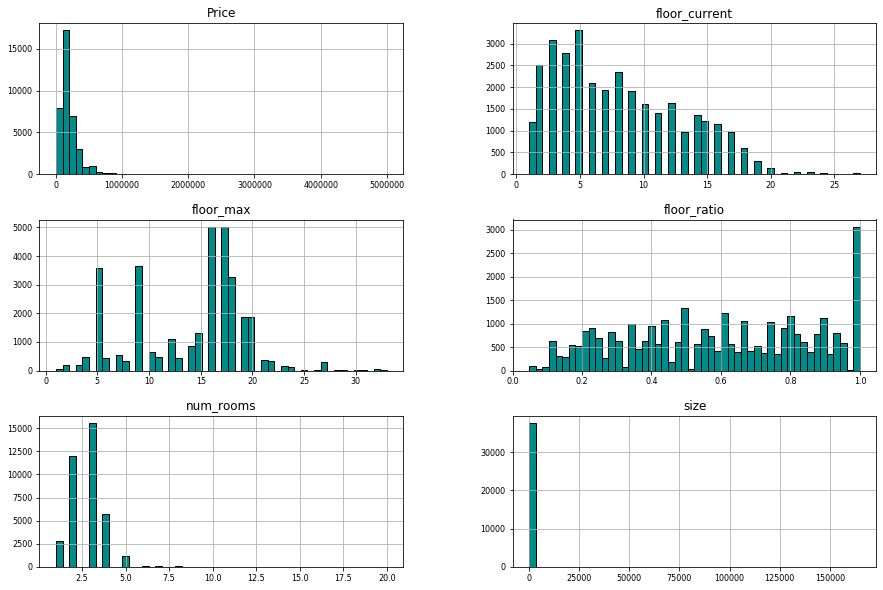

In [55]:
import matplotlib.pyplot as plt

fig_ = df_1.hist(figsize=(15, 10), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

plt.show()

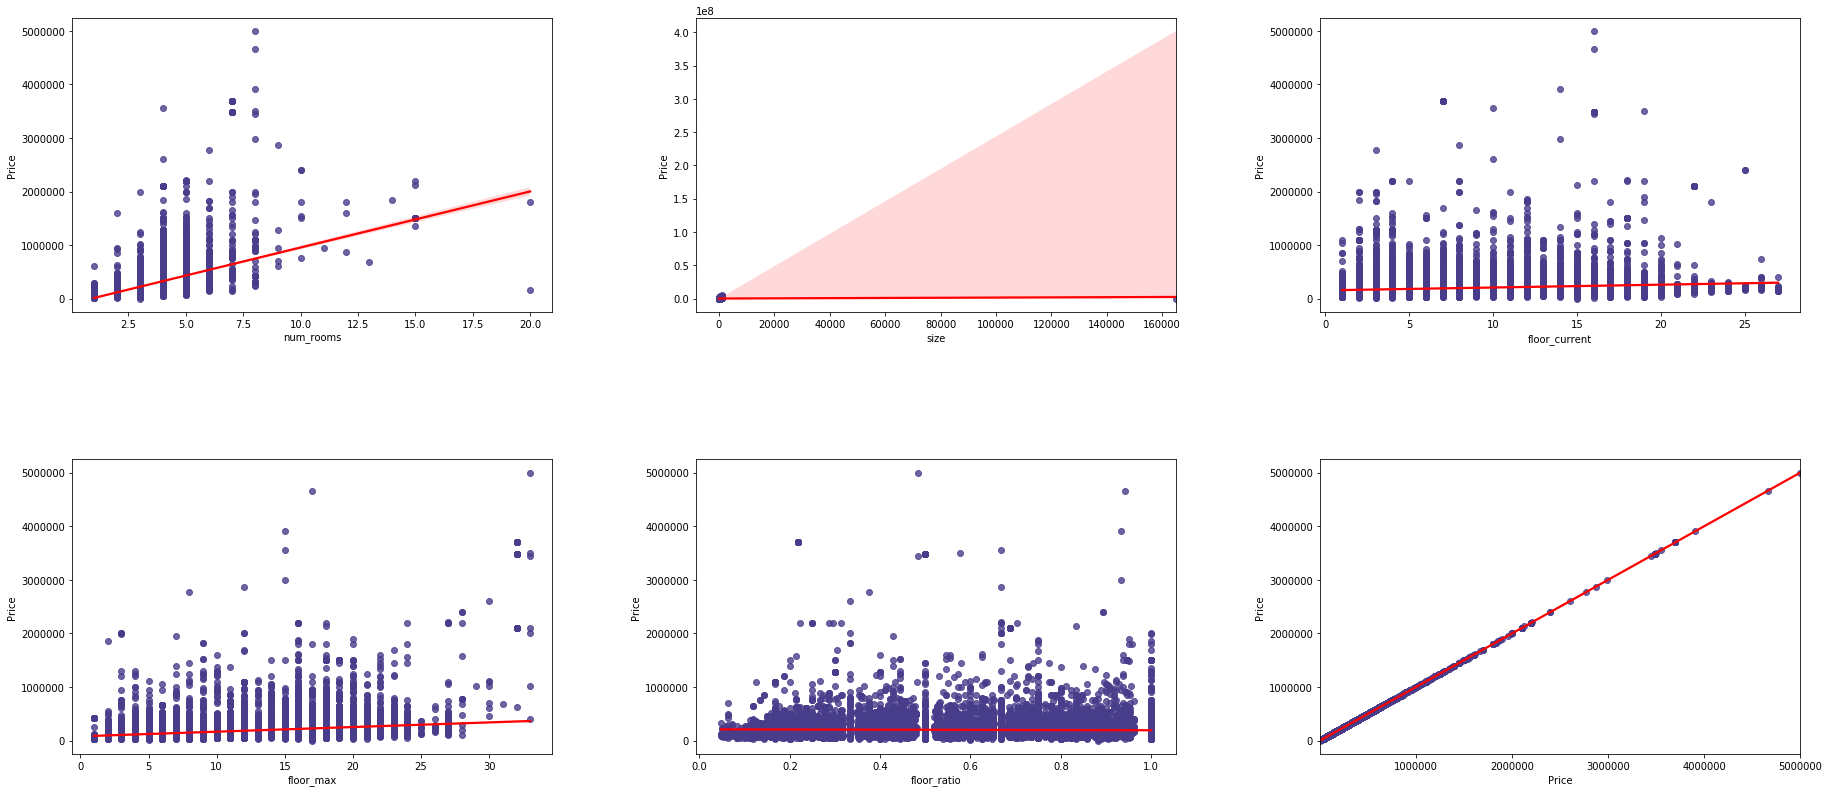

In [73]:
import seaborn as sns

fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_1[['num_rooms', 'size', 'floor_current', 'floor_max', 'floor_ratio', 'Price' ]].columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "Price", data=df_1[['num_rooms', 'size', 'floor_current', 'floor_max', 'floor_ratio', 'Price' ]], scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

In [63]:
df_1['Price'].quantile(.99)

830100.0000000204

In [65]:
df_1[df_1['Price'] <= df_1['Price'].quantile(.99)]

,num_rooms,size,floor,Price,Location,Date,Today,floor_current,floor_max,floor_ratio
0,2,108.00,16/19,138000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022,16.00,19.00,0.84
1,3,103.00,5/9,143156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022,5.00,9.00,0.56
2,2,48.00,3/5,110000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022,3.00,5.00,0.60
3,3,108.10,12/13,153500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022,12.00,13.00,0.92
4,4,167.60,NaN,251400,28 May m.,"Bakı, 10 i̇yun 2022",06/15/2022,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
37595,2,90.00,19/21,110000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022,19.00,21.00,0.90
37596,3,163.00,9/17,309000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022,9.00,17.00,0.53
37597,2,110.00,11/17,180000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022,11.00,17.00,0.65
37598,4,90.00,8/9,168000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022,8.00,9.00,0.89


In [139]:
df_99 = df_1[(df_1['Price'] <= df_1['Price'].quantile(.99))
    & (df_1['size'] <= df_1['size'].quantile(.99))
    & (df_1['num_rooms'] <= df_1['num_rooms'].quantile(.99))
    & (df_1['floor_current'] <= df_1['floor_current'].quantile(.99))
    & (df_1['floor_max'] <= df_1['floor_max'].quantile(.99))
    & (df_1['floor_ratio'] <= df_1['floor_ratio'].quantile(.99))]

In [20]:
df_99.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,num_rooms,size,Price,floor_current,floor_max,floor_ratio
count,31789.00,31789.00,31789.00,31789.00,31789.00,31789.00
mean,2.77,104.04,182969.34,7.92,13.78,0.59
std,0.85,45.87,109378.48,4.75,5.23,0.27
min,1.00,3.00,1500.00,1.00,1.00,0.05
1%,1.00,35.00,50000.00,1.00,3.00,0.11
10%,2.00,54.00,81000.00,2.00,5.00,0.21
20%,2.00,64.00,99900.00,3.00,9.00,0.31
30%,2.00,73.00,118000.00,5.00,10.00,0.41
40%,3.00,85.00,135000.00,6.00,15.00,0.50
50%,3.00,96.00,153000.00,7.00,16.00,0.59


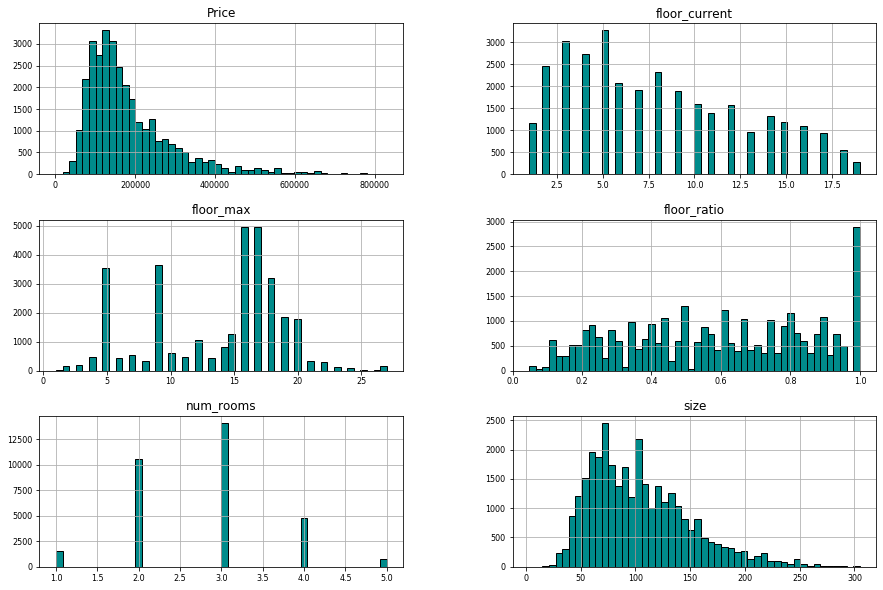

In [71]:
import matplotlib.pyplot as plt

fig_ = df_99.hist(figsize=(15, 10), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

plt.show()

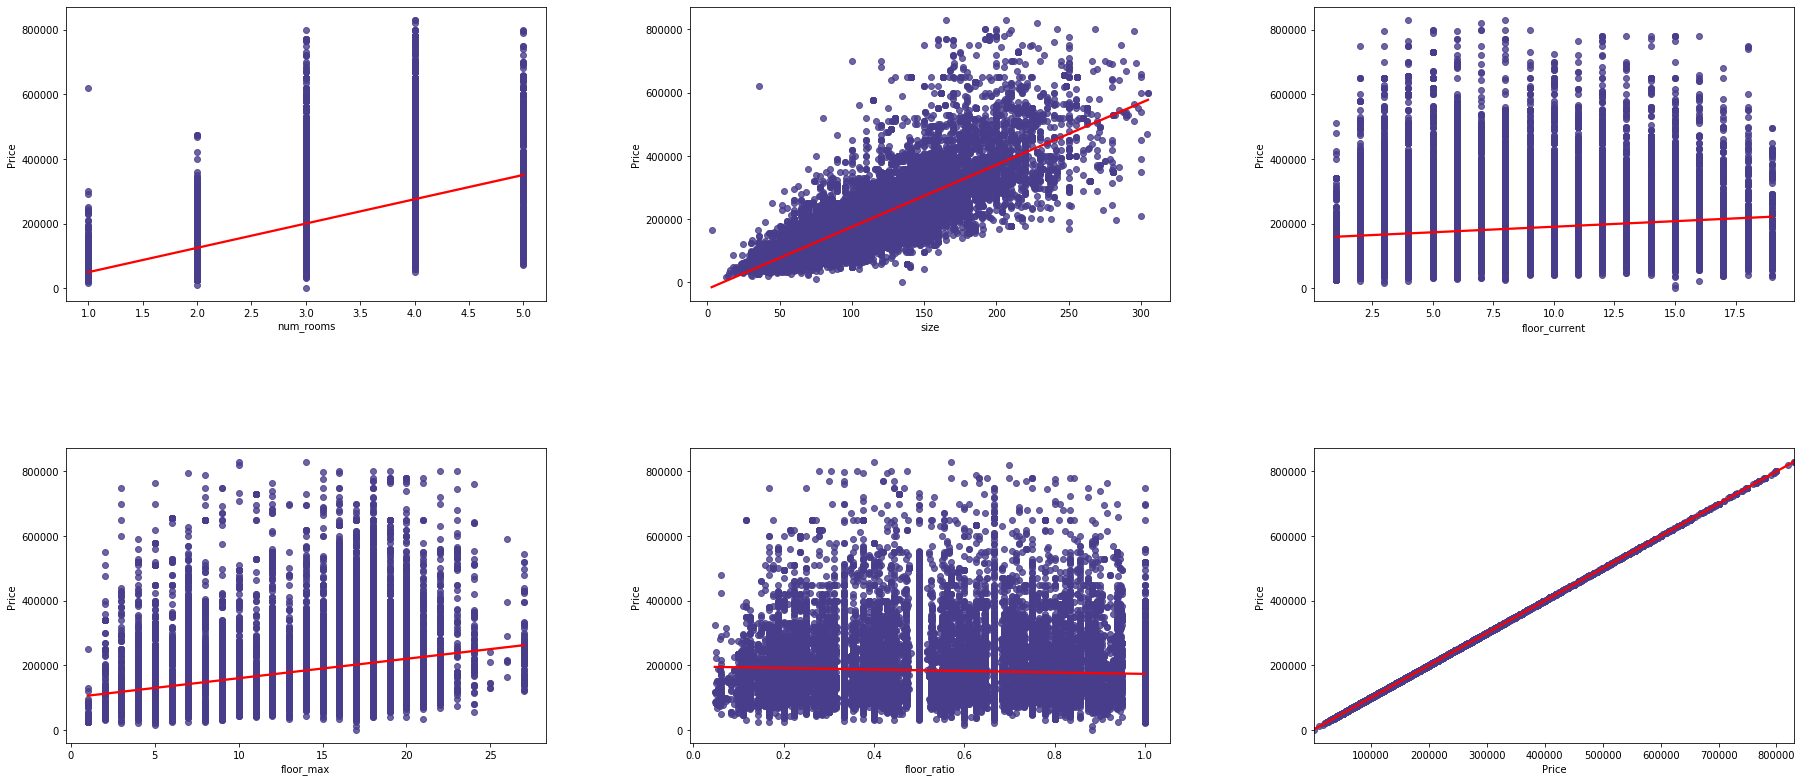

In [77]:
import seaborn as sns

fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_99[['num_rooms', 'size', 'floor_current', 'floor_max', 'floor_ratio', 'Price' ]].columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "Price", data=df_99[['num_rooms', 'size', 'floor_current', 'floor_max', 'floor_ratio', 'Price' ]], scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

In [76]:
df_99.columns

Index(['num_rooms', 'size', 'floor', 'Price', 'Location', 'Date', 'Today',
       'floor_current', 'floor_max', 'floor_ratio'],
      dtype='object')

Text(0.5, 1.0, 'Number of houses per location\n')

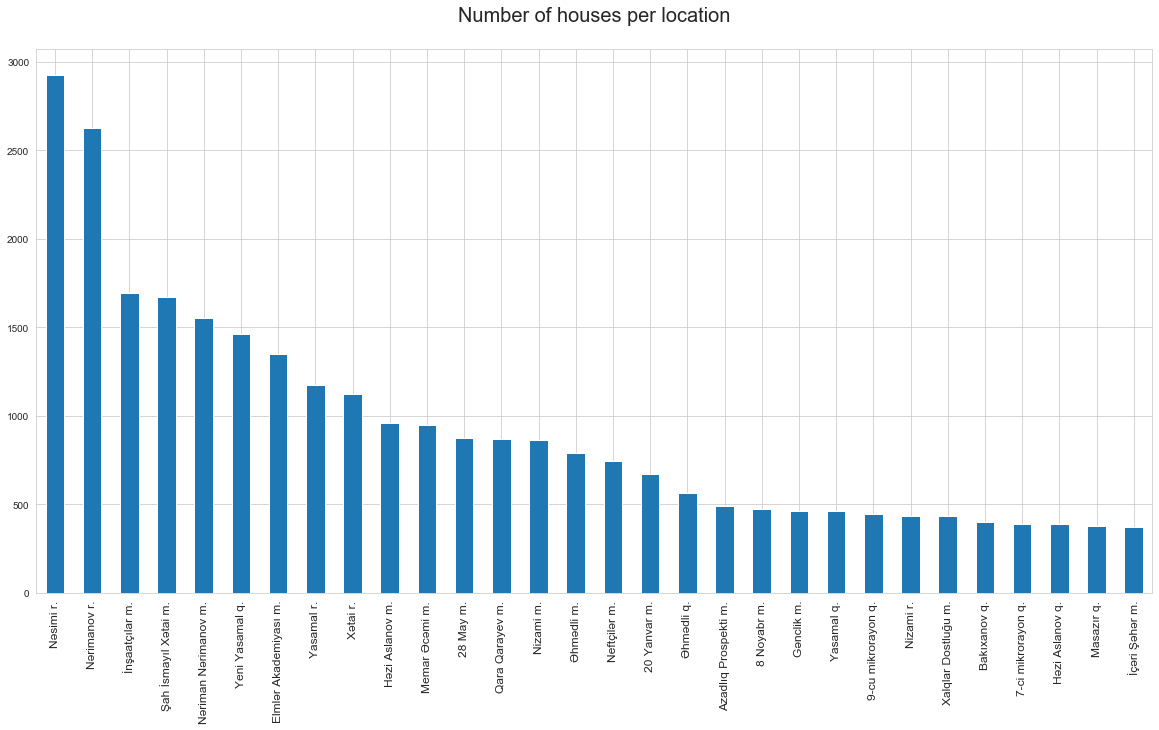

In [121]:
fig = plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")




df_99['Location'].value_counts().head(30).plot.bar(rot=0, subplots=True)

plt.xticks(rotation=90, fontsize = 12)

plt.title('Number of houses per location\n', fontsize = 20)



Text(0.5, 1.0, 'Mean price per location\n')

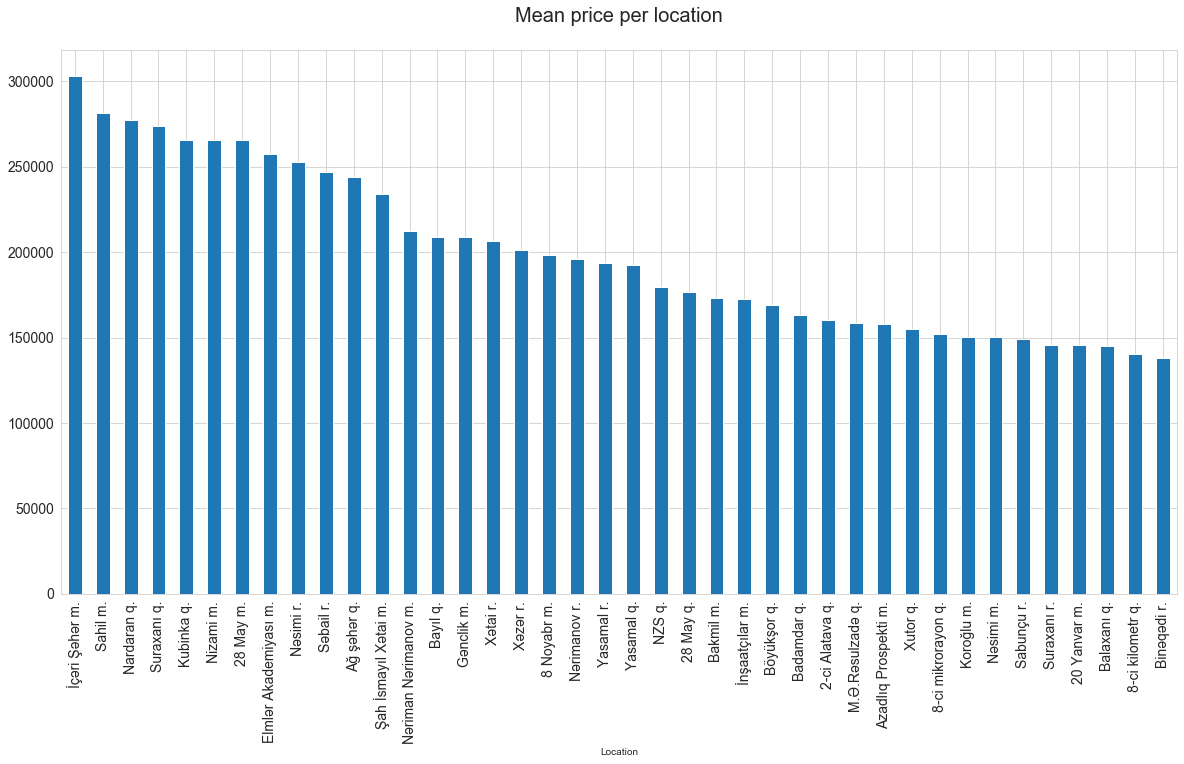

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")


df_99.groupby('Location')['Price'].mean().sort_values(ascending = False).head(40).plot.bar(rot=0, subplots=True)

plt.xticks(rotation=90, fontsize = 14)

plt.yticks(fontsize = 14)


plt.title('Mean price per location\n', fontsize = 20)

## mean price for number of rooms

Text(0.5, 1.0, 'Mean price per number of rooms\n')

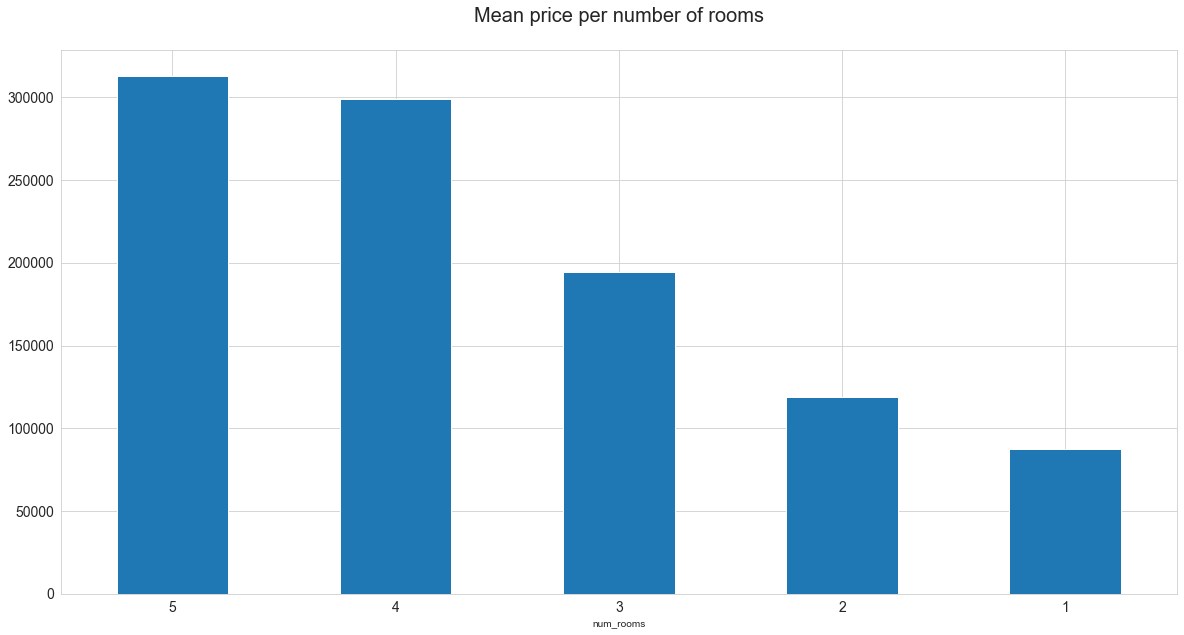

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")


df_99.groupby('num_rooms')['Price'].mean().sort_values(ascending = False).head(40).plot.bar(rot=0, subplots=True)

plt.xticks(fontsize = 14)

plt.yticks(fontsize = 14)


plt.title('Mean price per number of rooms\n', fontsize = 20)

In [148]:
df_99[['num_rooms', 'size', 'floor_ratio', 'Price' ]].corr()

,num_rooms,size,floor_ratio,Price
num_rooms,1.00,0.75,0.02,0.59
size,0.75,1.00,-0.04,0.82
floor_ratio,0.02,-0.04,1.00,-0.06
Price,0.59,0.82,-0.06,1.00


In [147]:
df_99

,num_rooms,size,floor,Price,Location,Date,Today,floor_current,floor_max,floor_ratio
0,2,108.00,16/19,138000,Xətai r.,"Bakı, 03 i̇yun 2022",06/15/2022,16.00,19.00,0.84
1,3,103.00,5/9,143156,İnşaatçılar m.,"Bakı, 12 i̇yun 2022",06/15/2022,5.00,9.00,0.56
2,2,48.00,3/5,110000,Səbail r.,"Bakı, 13 i̇yun 2022",06/15/2022,3.00,5.00,0.60
3,3,108.10,12/13,153500,20 Yanvar m.,"Bakı, 12 i̇yun 2022",06/15/2022,12.00,13.00,0.92
8,1,67.00,17/18,82500,Badamdar q.,"Bakı, bugün 15:13",06/15/2022,17.00,18.00,0.94
...,...,...,...,...,...,...,...,...,...,...
37595,2,90.00,19/21,110000,Yeni Yasamal q.,"Bakı, 18 may 2022",06/15/2022,19.00,21.00,0.90
37596,3,163.00,9/17,309000,Elmlər Akademiyası m.,"Bakı, 16 may 2022",06/15/2022,9.00,17.00,0.53
37597,2,110.00,11/17,180000,Nəsimi r.,"Bakı, 12 may 2022",06/15/2022,11.00,17.00,0.65
37598,4,90.00,8/9,168000,Azadlıq Prospekti m.,"Bakı, 03 i̇yun 2022",06/15/2022,8.00,9.00,0.89


# I do the scrapping again to collect extra data

In [118]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 1

data=[] #List to store price of the product

while page != 2:
    print(f'Scraping page {page}')
    
    url = f"https://bina.az/baki/alqi-satqi/menziller?page={page}"
    page_main = requests.get(url)
    soup = BeautifulSoup(page_main.content, "html.parser")

    for results in soup.find_all('div',class_='items_list'):        #there are multiple listing containers
        for item in results.find_all('div',class_='items-i'):

            location = item.find(class_="location").text.strip()
            
            try:
                bill = item.find('div',class_='bill_of_sale').find('span').text.strip()
            except AttributeError:
                bill = ''

            try:
                mort = item.find('div',class_='mortgage').find('span').text.strip()
            except AttributeError:
                mort = ''

            price = item.find('div',class_='price').text.strip()
                    
            rooms,size,floor = ('','','')
            for detail in item.find('ul',class_='name').find_all('li'):
                if 'otaqlı' in detail.text:
                    rooms = detail.text.strip()
                elif 'm²' in detail.text:
                    size = detail.text.strip()
                elif 'mərtəbə' in detail.text:
                    floor = detail.text.strip()
                
    
            item = {
                'location':location,
                'bill':bill,
                'mortage':mort,
                'price': price,
                'rooms':rooms,
                'size':size,
                'floor':floor
                }

            data.append(item)

    page += 1
    
df = pd.DataFrame(data)
#df.to_csv('locations.csv',index=False)

Scraping page 1


In [119]:
df.head(10)

,location,bill,mortage,price,rooms,size,floor
0,Sahil m.,Kupça var,,279 000AZN,4 otaqlı,110 m²,3/4 mərtəbə
1,Nəsimi r.,Kupça var,,270 000AZN,3 otaqlı,116 m²,4/17 mərtəbə
2,Xətai r.,,,129 000AZN,3 otaqlı,147 m²,8/13 mərtəbə
3,Nəriman Nərimanov m.,,,161 000AZN,2 otaqlı,61 m²,6/11 mərtəbə
4,Sea Breeze,,,173 731AZN,2 otaqlı,75.7 m²,
5,Bakı,,,180 638AZN,2 otaqlı,73.7 m²,
6,Bakı,,,124 337AZN,3 otaqlı,99.5 m²,
7,Bakı,,,323 000AZN,3 otaqlı,170 m²,
8,Şah İsmayıl Xətai m.,Kupça var,İpoteka var,250 000AZN,3 otaqlı,117 m²,11/16 mərtəbə
9,Yasamal r.,,,208 000AZN,3 otaqlı,148 m²,11/27 mərtəbə


In [43]:
df['currency'] = df['price'].str[-3:]

In [44]:
df['price_cleaned'] = df['price'].map(lambda x: str(x)[:-3]).str.replace(' ', '').astype(int)

In [45]:
df['rooms_cleaned'] = df['rooms'].str.split('otaqlı', 1, expand=True)[0]


In [46]:
df['size_cleaned'] = df['size'].str.split('m²', 1, expand=True)[0]

In [47]:
df['floor_cleaned'] = df['floor'].str.split('mərtəbə', 1, expand=True)[0]

In [48]:
df

,location,bill,mortage,price,rooms,size,floor,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_cleaned
0,Nəriman Nərimanov m.,,İpoteka var,118 450AZN,1 otaqlı,51.5 m²,7/15 mərtəbə,AZN,118450,1,51.5,7/15
1,Nərimanov r.,Kupça var,İpoteka var,86 640AZN,1 otaqlı,45.6 m²,14/16 mərtəbə,AZN,86640,1,45.6,14/16
2,28 May m.,,,113 000AZN,2 otaqlı,67 m²,12/16 mərtəbə,AZN,113000,2,67,12/16
3,Nərimanov r.,Kupça var,,319 000AZN,3 otaqlı,149 m²,11/18 mərtəbə,AZN,319000,3,149,11/18
4,Bakı,,,279 335AZN,3 otaqlı,121.5 m²,,AZN,279335,3,121.5,
5,Bakı,,,116 110AZN,1 otaqlı,68.3 m²,,AZN,116110,1,68.3,
6,Bakı,,,316 756AZN,3 otaqlı,137.7 m²,,AZN,316756,3,137.7,
7,Sea Breeze,,,263 814AZN,2 otaqlı,75.7 m²,,AZN,263814,2,75.7,
8,Neftçilər m.,,,162 000AZN,3 otaqlı,90 m²,13/17 mərtəbə,AZN,162000,3,90,13/17
9,Nardaran q.,Kupça var,İpoteka var,291 465AZN,3 otaqlı,127 m²,2/7 mərtəbə,AZN,291465,3,127,2/7


# now let's write another loop to extract data for all types of object types

In [58]:

object_types = ['menziller', 'menziller/yeni-tikili', 'menziller/kohne-tikili', 'evler', 'baglar', 'ofisler',
               'qarajlar', 'torpaq', 'obyektler']


In [59]:
object_types[0]

'menziller'

In [61]:
len(object_types)

9

In [85]:
page = 1 


while page != 3:
    
    for i in range(len(object_types)):
        
        url = f"https://bina.az/baki/alqi-satqi/{object_types[i]}?page={page}"
        
        print(f'{url}')
        
    page += 1

https://bina.az/baki/alqi-satqi/menziller?page=1
https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page=1
https://bina.az/baki/alqi-satqi/menziller/kohne-tikili?page=1
https://bina.az/baki/alqi-satqi/evler?page=1
https://bina.az/baki/alqi-satqi/baglar?page=1
https://bina.az/baki/alqi-satqi/ofisler?page=1
https://bina.az/baki/alqi-satqi/qarajlar?page=1
https://bina.az/baki/alqi-satqi/torpaq?page=1
https://bina.az/baki/alqi-satqi/obyektler?page=1
https://bina.az/baki/alqi-satqi/menziller?page=2
https://bina.az/baki/alqi-satqi/menziller/yeni-tikili?page=2
https://bina.az/baki/alqi-satqi/menziller/kohne-tikili?page=2
https://bina.az/baki/alqi-satqi/evler?page=2
https://bina.az/baki/alqi-satqi/baglar?page=2
https://bina.az/baki/alqi-satqi/ofisler?page=2
https://bina.az/baki/alqi-satqi/qarajlar?page=2
https://bina.az/baki/alqi-satqi/torpaq?page=2
https://bina.az/baki/alqi-satqi/obyektler?page=2


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

object_types = ['menziller', 'menziller/yeni-tikili', 'menziller/kohne-tikili', 'evler', 'baglar', 'ofisler',
               'qarajlar', 'torpaq', 'obyektler']

data=[] #List to store price of the product

page = 1

while page != 2:

    print(f'Scraping page: {page}')
    
    
    for i in range(len(object_types)):
        
        print(f'Object type: {object_types[i]}')
        
        url = f"https://bina.az/baki/alqi-satqi/{object_types[i]}?page={page}"
       
    
        page_main = requests.get(url)
        soup = BeautifulSoup(page_main.content, "html.parser")
        
        
        
        for results in soup.find_all('div',class_='items_list'):        #there are multiple listing containe
            
            for item in results.find_all('div',class_='items-i'):
                
                location = item.find(class_="location").text.strip()
                
                try:
                    bill = item.find('div',class_='bill_of_sale').find('span').text.strip()
                except AttributeError:
                    bill = ''

                try:
                    mort = item.find('div',class_='mortgage').find('span').text.strip()
                except AttributeError:
                    mort = ''

                price = item.find('div',class_='price').text.strip()
                 
                object_type = object_types[i]
                page_number = page
                
                rooms,size,floor = ('','','')
                
                time_posted = item.find('div',class_='city_when').text.strip()
                
                
                for detail in item.find('ul',class_='name').find_all('li'):
                    
                    if 'otaqlı' in detail.text:
                        rooms = detail.text.strip()
                    elif 'm²' in detail.text:
                        size = detail.text.strip()
                    elif 'mərtəbə' in detail.text:
                        floor = detail.text.strip()
                    
                    
                item = {
                    'location':location,
                    'bill':bill,
                    'mortage':mort,
                    'price': price,
                    'rooms':rooms,
                    'size':size,
                    'floor':floor,
                    'object_type':  object_type,
                    'page_number': page_number,
                    'time_posted': time_posted
                    }

                data.append(item)
                    
                    
    page += 1
    
    
df = pd.DataFrame(data)

df

Scraping page: 1
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler


,location,bill,mortage,price,rooms,size,floor,object_type,page_number,time_posted
0,Neftçilər m.,Kupça var,İpoteka var,148 000AZN,3 otaqlı,135 m²,6/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022"
1,Nərimanov r.,Kupça var,,300 000AZN,3 otaqlı,126 m²,3/9 mərtəbə,menziller,1,"Bakı, 06 i̇yun 2022"
2,Nərimanov r.,Kupça var,,389 000AZN,3 otaqlı,177.5 m²,4/16 mərtəbə,menziller,1,"Bakı, 11 i̇yun 2022"
3,Nəsimi r.,Kupça var,,410 000AZN,4 otaqlı,182 m²,12/13 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022"
4,Sea Breeze,,,147 109AZN,1 otaqlı,64.1 m²,,menziller,1,"Bakı, bugün 13:50"
...,...,...,...,...,...,...,...,...,...,...
253,Nizami m.,Kupça var,,470 000AZN,,230 m²,,obyektler,1,"Bakı, bugün 13:10"
254,Bakıxanov q.,Kupça var,,135 000AZN,,84 m²,,obyektler,1,"Bakı, bugün 13:07"
255,Mərdəkan q.,Kupça var,,250 000AZN,,385 m²,,obyektler,1,"Bakı, bugün 12:57"
256,Elmlər Akademiyası m.,Kupça var,,320 000AZN,,155 m²,,obyektler,1,"Bakı, bugün 12:49"


In [10]:
df

,location,bill,mortage,price,rooms,size,floor,object_type,page_number,time_posted
0,Neftçilər m.,Kupça var,İpoteka var,148 000AZN,3 otaqlı,135 m²,6/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022"
1,Nərimanov r.,Kupça var,,300 000AZN,3 otaqlı,126 m²,3/9 mərtəbə,menziller,1,"Bakı, 06 i̇yun 2022"
2,Nərimanov r.,Kupça var,,389 000AZN,3 otaqlı,177.5 m²,4/16 mərtəbə,menziller,1,"Bakı, 11 i̇yun 2022"
3,Nəsimi r.,Kupça var,,410 000AZN,4 otaqlı,182 m²,12/13 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022"
4,Sea Breeze,,,147 109AZN,1 otaqlı,64.1 m²,,menziller,1,"Bakı, bugün 13:50"
...,...,...,...,...,...,...,...,...,...,...
253,Nizami m.,Kupça var,,470 000AZN,,230 m²,,obyektler,1,"Bakı, bugün 13:10"
254,Bakıxanov q.,Kupça var,,135 000AZN,,84 m²,,obyektler,1,"Bakı, bugün 13:07"
255,Mərdəkan q.,Kupça var,,250 000AZN,,385 m²,,obyektler,1,"Bakı, bugün 12:57"
256,Elmlər Akademiyası m.,Kupça var,,320 000AZN,,155 m²,,obyektler,1,"Bakı, bugün 12:49"


In [11]:
df['object_type'].value_counts()

menziller/yeni-tikili     32
menziller                 32
evler                     28
qarajlar                  28
baglar                    28
obyektler                 28
menziller/kohne-tikili    28
torpaq                    28
ofisler                   26
Name: object_type, dtype: int64

# i need data from 3 different cities: Xirdalan, Baku and Sumqayit


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

object_types = ['menziller', 'menziller/yeni-tikili', 'menziller/kohne-tikili', 'evler', 'baglar', 'ofisler',
               'qarajlar', 'torpaq', 'obyektler']

cities= ['baki', 'sumqayit', 'xirdalan']


data=[] #List to store price of the product

page = 1

while page != 2:

    print(f'Scraping page: {page}')
    
    for n in range(len(cities)):
        
        print(f'Object type: {cities[n].upper()}')
    
        for i in range(len(object_types)):
        
            print(f'Object type: {object_types[i]}')
        
            url = f"https://bina.az/{cities[n]}/alqi-satqi/{object_types[i]}?page={page}"
       
    
            page_main = requests.get(url)
            soup = BeautifulSoup(page_main.content, "html.parser")
        
        
        
            for results in soup.find_all('div',class_='items_list'):        #there are multiple listing containe
            
                for item in results.find_all('div',class_='items-i'):
                
                    location = item.find(class_="location").text.strip()
                
                    try:
                        bill = item.find('div',class_='bill_of_sale').find('span').text.strip()
                    except AttributeError:
                        bill = ''

                    try:
                        mort = item.find('div',class_='mortgage').find('span').text.strip()
                    except AttributeError:
                        mort = ''

                    price = item.find('div',class_='price').text.strip()
                 
                    object_type = object_types[i]
                    page_number = page
                
                    rooms,size,floor = ('','','')
                
                    time_posted = item.find('div',class_='city_when').text.strip()
                
                    city = cities[n]
                    
                    for detail in item.find('ul',class_='name').find_all('li'):
                    
                        if 'otaqlı' in detail.text:
                            rooms = detail.text.strip()
                        elif 'm²' in detail.text:
                            size = detail.text.strip()
                        elif 'mərtəbə' in detail.text:
                            floor = detail.text.strip()
                    
                    
                    item = {
                        'location':location,
                        'bill':bill,
                        'mortage':mort,
                        'price': price,
                        'rooms':rooms,
                        'size':size,
                        'floor':floor,
                        'object_type':  object_type,
                        'page_number': page_number,
                        'time_posted': time_posted,
                        'city': city
                        }

                    data.append(item)
                    
                    
    page += 1
    
    
df = pd.DataFrame(data)

df

Scraping page: 1
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler


,location,bill,mortage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Şah İsmayıl Xətai m.,Kupça var,,152 000AZN,2 otaqlı,80 m²,3/20 mərtəbə,menziller,1,"Bakı, 14 i̇yun 2022",baki
1,Xətai r.,Kupça var,,309 000AZN,4 otaqlı,152 m²,4/17 mərtəbə,menziller,1,"Bakı, bugün 10:32",baki
2,28 May m.,Kupça var,,298 000AZN,4 otaqlı,183.4 m²,5/18 mərtəbə,menziller,1,"Bakı, 24 may 2022",baki
3,Memar Əcəmi m.,,,109 000AZN,3 otaqlı,57 m²,15/17 mərtəbə,menziller,1,"Bakı, bugün 11:17",baki
4,Bakı,,,57 112AZN,1 otaqlı,45.7 m²,,menziller,1,"Bakı, bugün 10:39",baki
...,...,...,...,...,...,...,...,...,...,...,...
586,Xırdalan,Kupça var,,650 000AZN,,300 m²,,obyektler,1,"Xırdalan, 08 i̇yun 2022",xirdalan
587,Xırdalan,Kupça var,,22 500AZN,,27 m²,,obyektler,1,"Xırdalan, 31 may 2022",xirdalan
588,Xırdalan,Kupça var,,1 500 000AZN,,1342 m²,,obyektler,1,"Xırdalan, 30 may 2022",xirdalan
589,Xırdalan,,,345 000AZN,,550 m²,,obyektler,1,"Xırdalan, 30 may 2022",xirdalan


## the script works. Now, I scrape all pages. There are around 1200 pages

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

object_types = ['menziller', 'menziller/yeni-tikili', 'menziller/kohne-tikili', 'evler', 'baglar', 'ofisler',
               'qarajlar', 'torpaq', 'obyektler']

cities= ['baki', 'sumqayit', 'xirdalan']


data=[] #List to store price of the product

page = 1

while page != 12:

    print(f'Scraping page: {page}')
    
    for n in range(len(cities)):
        
        print(f'Object type: {cities[n].upper()}')
    
        for i in range(len(object_types)):
        
            print(f'Object type: {object_types[i]}')
        
            url = f"https://bina.az/{cities[n]}/alqi-satqi/{object_types[i]}?page={page}"
       
    
            page_main = requests.get(url)
            soup = BeautifulSoup(page_main.content, "html.parser")
        
        
        
            for results in soup.find_all('div',class_='items_list'):        #there are multiple listing containe
            
                for item in results.find_all('div',class_='items-i'):
                
                    location = item.find(class_="location").text.strip()
                
                    try:
                        bill = item.find('div',class_='bill_of_sale').find('span').text.strip()
                    except AttributeError:
                        bill = 'Kupça yoxdur'

                    try:
                        mort = item.find('div',class_='mortgage').find('span').text.strip()
                    except AttributeError:
                        mort = 'İpoteka yoxdur'

                    price = item.find('div',class_='price').text.strip()
                 
                    object_type = object_types[i]
                    page_number = page
                
                    rooms,size,floor = ('','','')
                
                    time_posted = item.find('div',class_='city_when').text.strip()
                
                    city = cities[n]
                    
                    for detail in item.find('ul',class_='name').find_all('li'):
                    
                        if 'otaqlı' in detail.text:
                            rooms = detail.text.strip()
                        elif 'm²' in detail.text:
                            size = detail.text.strip()
                        elif 'mərtəbə' in detail.text:
                            floor = detail.text.strip()
                    
                    
                    item = {
                        'location':location,
                        'bill':bill,
                        'mortgage':mort,
                        'price': price,
                        'rooms':rooms,
                        'size':size,
                        'floor':floor,
                        'object_type':  object_type,
                        'page_number': page_number,
                        'time_posted': time_posted,
                        'city': city
                        }

                    data.append(item)
                    
                    
    page += 1
    
    
df = pd.DataFrame(data)

df

Scraping page: 1
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 2
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object typ

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Nəsimi r.,Kupça var,İpoteka var,119 900AZN,1 otaqlı,54.5 m²,3/16 mərtəbə,menziller,1,"Bakı, 10 i̇yun 2022",baki
1,Memar Əcəmi m.,Kupça var,İpoteka var,113 000AZN,3 otaqlı,85 m²,9/9 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
2,Şah İsmayıl Xətai m.,Kupça var,İpoteka yoxdur,115 000AZN,1 otaqlı,55 m²,9/16 mərtəbə,menziller,1,"Bakı, 18 i̇yun 2022",baki
3,Nərimanov r.,Kupça var,İpoteka yoxdur,240 000AZN,3 otaqlı,171.2 m²,9/19 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
4,Sea Breeze,Kupça yoxdur,İpoteka yoxdur,147 109AZN,1 otaqlı,64.1 m²,,menziller,1,"Bakı, bugün 13:50",baki
...,...,...,...,...,...,...,...,...,...,...,...
3784,Xırdalan,Kupça var,İpoteka yoxdur,118 000AZN,3 otaqlı,86 m²,5/17 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 12 i̇yun 2022",xirdalan
3785,Xırdalan,Kupça var,İpoteka yoxdur,67 000AZN,2 otaqlı,55 m²,2/5 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 12 i̇yun 2022",xirdalan
3786,Xırdalan,Kupça var,İpoteka var,57 000AZN,2 otaqlı,50 m²,1/15 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, dünən 11:27",xirdalan
3787,Xırdalan,Kupça var,İpoteka yoxdur,78 000AZN,4 otaqlı,150 m²,6/7 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 13 i̇yun 2022",xirdalan


# here, I get an error becasue the scrapping fails after a certain number of lines, namely after 45 pages

In [64]:
df = pd.DataFrame(data)

df

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Nəsimi r.,Kupça var,İpoteka var,119 900AZN,1 otaqlı,54.5 m²,3/16 mərtəbə,menziller,1,"Bakı, 10 i̇yun 2022",baki
1,Memar Əcəmi m.,Kupça var,İpoteka var,113 000AZN,3 otaqlı,85 m²,9/9 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
2,Şah İsmayıl Xətai m.,Kupça var,İpoteka yoxdur,115 000AZN,1 otaqlı,55 m²,9/16 mərtəbə,menziller,1,"Bakı, 18 i̇yun 2022",baki
3,Nərimanov r.,Kupça var,İpoteka yoxdur,240 000AZN,3 otaqlı,171.2 m²,9/19 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
4,Sea Breeze,Kupça yoxdur,İpoteka yoxdur,147 109AZN,1 otaqlı,64.1 m²,,menziller,1,"Bakı, bugün 13:50",baki
...,...,...,...,...,...,...,...,...,...,...,...
3784,Xırdalan,Kupça var,İpoteka yoxdur,118 000AZN,3 otaqlı,86 m²,5/17 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 12 i̇yun 2022",xirdalan
3785,Xırdalan,Kupça var,İpoteka yoxdur,67 000AZN,2 otaqlı,55 m²,2/5 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 12 i̇yun 2022",xirdalan
3786,Xırdalan,Kupça var,İpoteka var,57 000AZN,2 otaqlı,50 m²,1/15 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, dünən 11:27",xirdalan
3787,Xırdalan,Kupça var,İpoteka yoxdur,78 000AZN,4 otaqlı,150 m²,6/7 mərtəbə,menziller/yeni-tikili,11,"Xırdalan, 13 i̇yun 2022",xirdalan


In [65]:
df['mortgage'].value_counts()

İpoteka yoxdur    3345
İpoteka var        444
Name: mortgage, dtype: int64

In [66]:
df.head()

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Nəsimi r.,Kupça var,İpoteka var,119 900AZN,1 otaqlı,54.5 m²,3/16 mərtəbə,menziller,1,"Bakı, 10 i̇yun 2022",baki
1,Memar Əcəmi m.,Kupça var,İpoteka var,113 000AZN,3 otaqlı,85 m²,9/9 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
2,Şah İsmayıl Xətai m.,Kupça var,İpoteka yoxdur,115 000AZN,1 otaqlı,55 m²,9/16 mərtəbə,menziller,1,"Bakı, 18 i̇yun 2022",baki
3,Nərimanov r.,Kupça var,İpoteka yoxdur,240 000AZN,3 otaqlı,171.2 m²,9/19 mərtəbə,menziller,1,"Bakı, 16 i̇yun 2022",baki
4,Sea Breeze,Kupça yoxdur,İpoteka yoxdur,147 109AZN,1 otaqlı,64.1 m²,,menziller,1,"Bakı, bugün 13:50",baki


### here, I vizualize this dataframe, but this is just 12 pages.

In [67]:
df['price_cleaned'] = df['price'].map(lambda x: str(x)[:-3]).str.replace(' ', '').astype(int)

In [68]:
df_1 = df[(df['object_type'] == 'menziller') & (df['city'] == 'baki')]

In [72]:
df_1['rooms_cleaned'] =  df_1['rooms'].str.split('otaqlı', 1, expand=True)[0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_2 = df_1[['bill', 'price_cleaned', 'rooms_cleaned']]

In [87]:
df_3 = pd.DataFrame(df_2.groupby(['rooms_cleaned','bill'])['price_cleaned'].mean())



In [142]:
df_2.shape

(352, 3)

In [96]:
df_4 = df_3.reset_index()

In [141]:
df_4

,rooms_cleaned,bill,price_cleaned
0,1,Kupça var,85550.00
1,1,Kupça yoxdur,100026.38
2,2,Kupça var,123430.14
3,2,Kupça yoxdur,139476.98
4,3,Kupça var,190720.93
5,3,Kupça yoxdur,204248.21
6,4,Kupça var,340307.69
7,4,Kupça yoxdur,314123.10
8,5,Kupça var,338583.33
9,5,Kupça yoxdur,555750.00


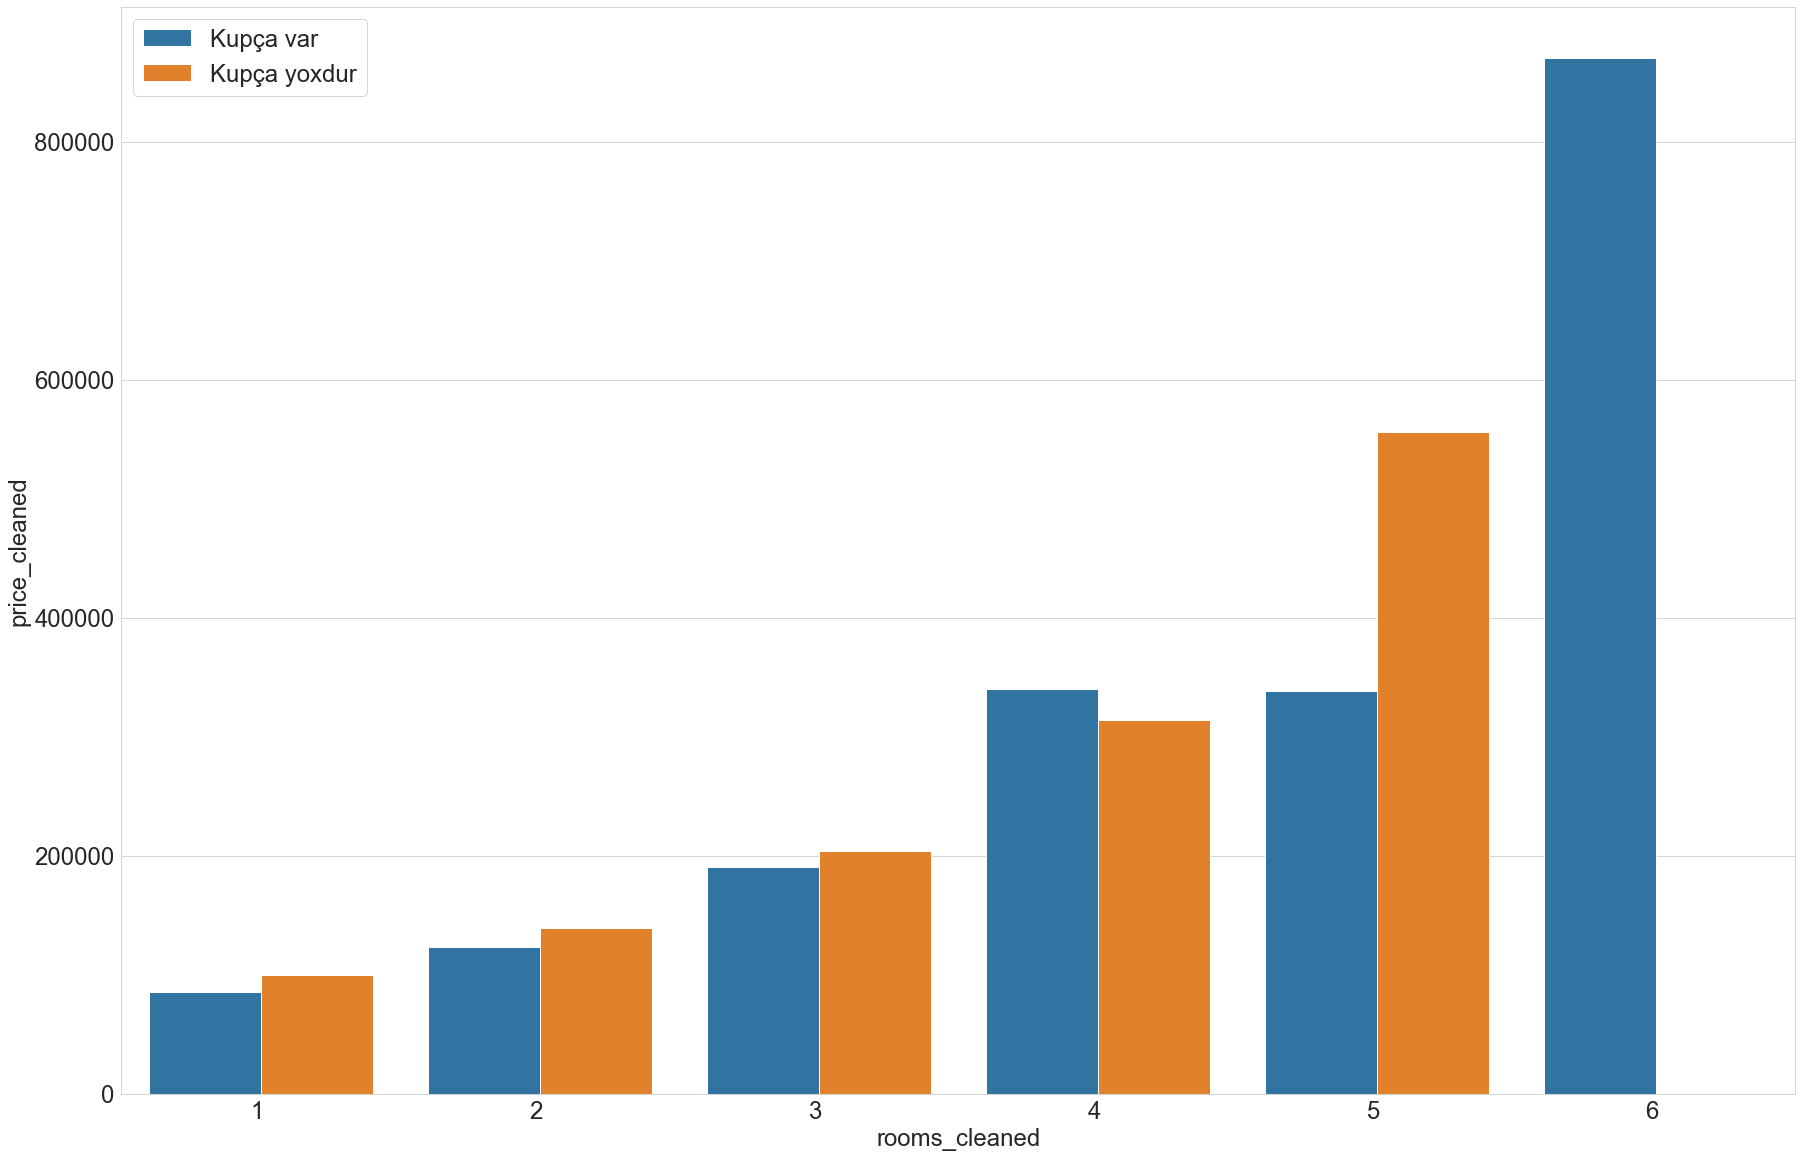

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_4, x='rooms_cleaned', y='price_cleaned', hue='bill')




plt.xticks(fontsize = 24)

plt.yticks(fontsize = 24)


ax.xaxis.label.set_size(24)
ax.yaxis.label.set_size(24)
plt.legend(fontsize=24) 

plt.show()

In [122]:
pd.options.display.float_format = '{:.2f}'.format


df_1.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,page_number,price_cleaned
count,352.00,352.00
mean,6.00,203583.02
std,3.17,131319.70
min,1.00,28500.00
1%,1.00,54510.00
10%,2.00,87000.00
20%,3.00,106000.00
30%,4.00,120000.00
40%,5.00,147043.60
50%,6.00,165000.00


In [124]:
df_1[['rooms_cleaned', 'price_cleaned']].dtypes

rooms_cleaned    object
price_cleaned     int64
dtype: object

In [126]:
df_1['rooms_cleaned'] = df_1['rooms_cleaned'].astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df_1[['rooms_cleaned', 'price_cleaned']].dtypes

rooms_cleaned    int64
price_cleaned    int64
dtype: object

In [128]:
df_1[['rooms_cleaned', 'price_cleaned']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,rooms_cleaned,price_cleaned
count,352.00,352.00
mean,2.83,203583.02
std,0.92,131319.70
min,1.00,28500.00
1%,1.00,54510.00
10%,2.00,87000.00
20%,2.00,106000.00
30%,2.00,120000.00
40%,3.00,147043.60
50%,3.00,165000.00


In [134]:
df_1.shape

(352, 13)

In [135]:
df_1[['rooms_cleaned', 'price_cleaned']].dtypes

rooms_cleaned    int64
price_cleaned    int64
dtype: object

In [137]:
df_5 = df_1[(df_1['rooms_cleaned'] <6) & (df_1['price_cleaned'] <= 620000)]

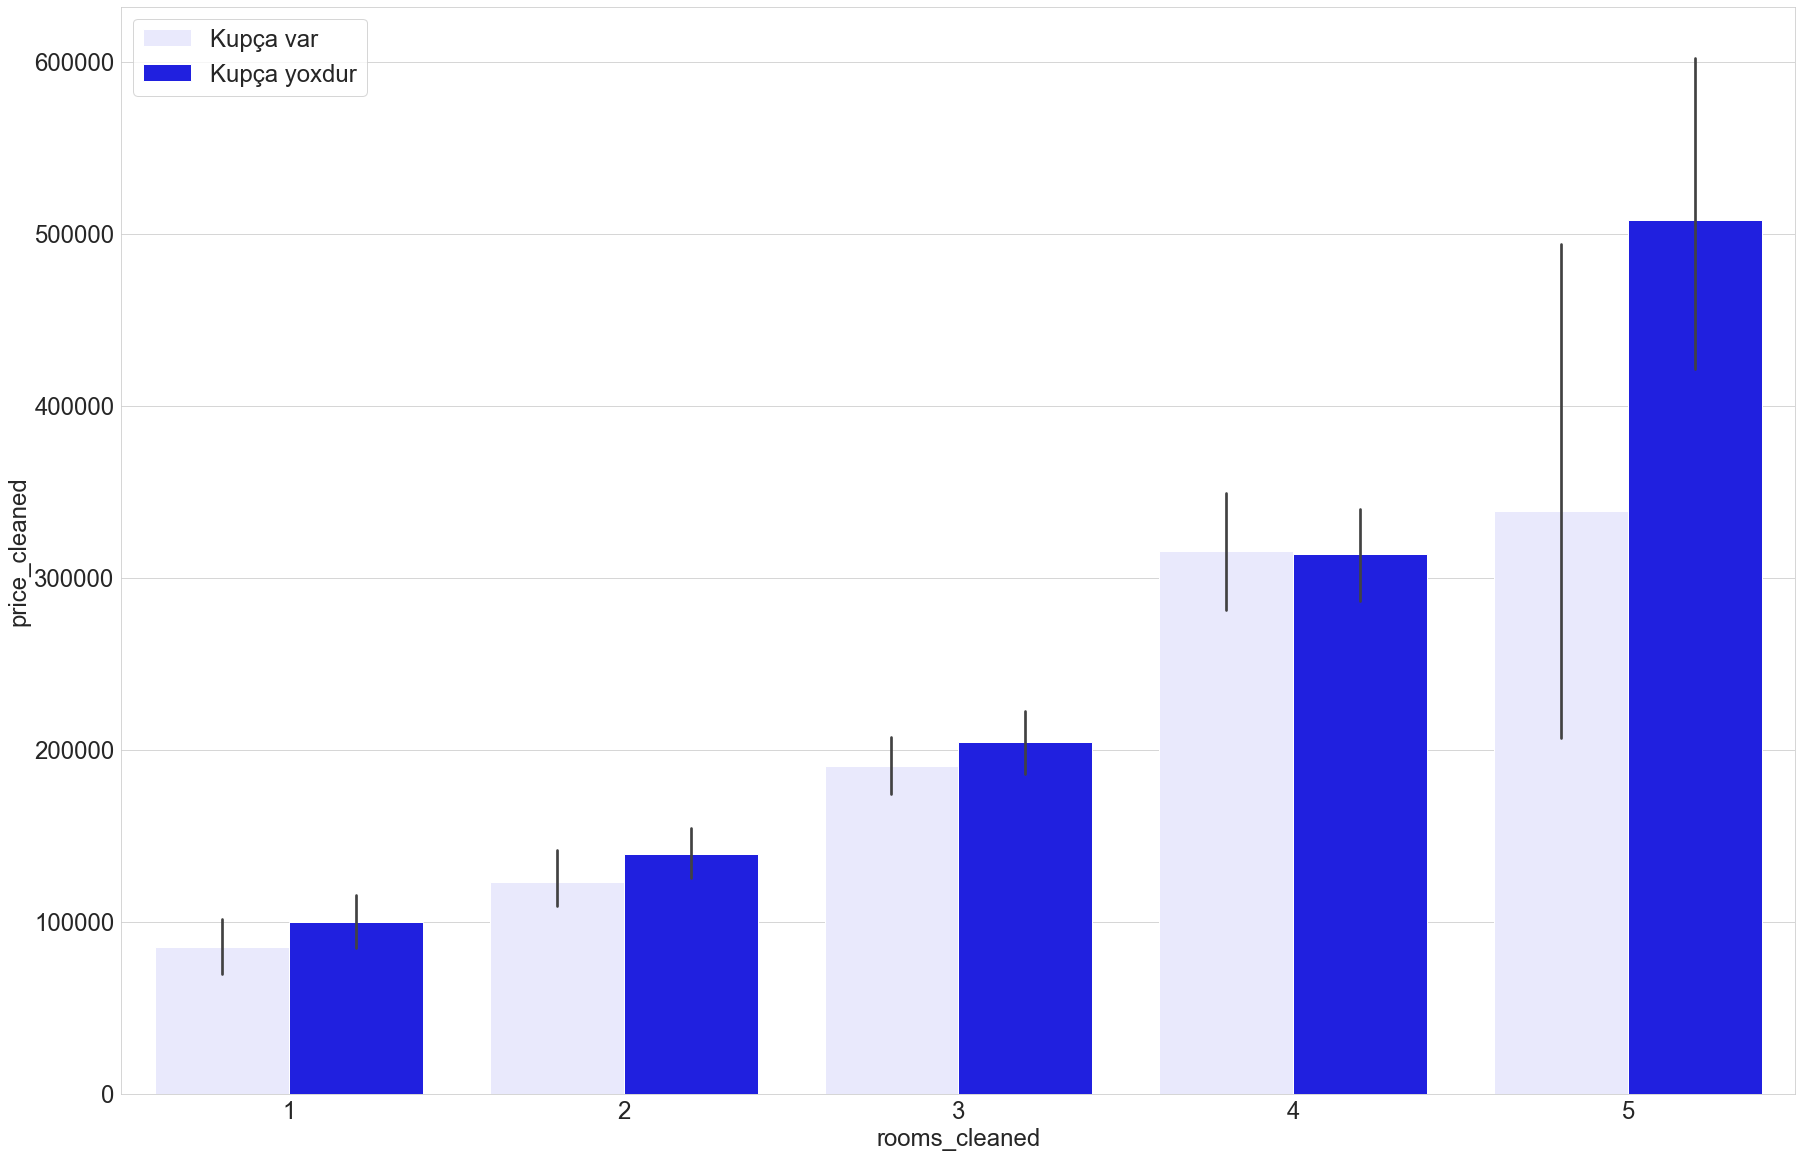

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_5, x='rooms_cleaned', y='price_cleaned', hue='bill', color = 'blue')




plt.xticks(fontsize = 24)

plt.yticks(fontsize = 24)


ax.xaxis.label.set_size(24)
ax.yaxis.label.set_size(24)
plt.legend(fontsize=24) 

plt.show()

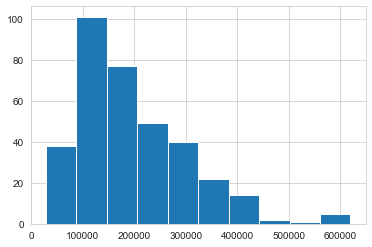

In [140]:
df_5['price_cleaned'].hist()

In [144]:
df_5.corr()

,page_number,price_cleaned,rooms_cleaned
page_number,1.00,0.11,0.12
price_cleaned,0.11,1.00,0.68
rooms_cleaned,0.12,0.68,1.00


# Here, I checked if visualization works for a fraction of data. Now, I need to apply an advanced statistical method to exclude outliers. However, this implementation should be done on a full dataset after checking the distribution of the variables.

## Now, there are the following steps:
1. Extracting all data after fixing connection failure.
2. Clean the data by applying advanced statistical methods (exclude outliers).
3. Create an interactive graph where one can choose a location and see the prices based on the number of rooms, size, bill of sale etc. 
4. The last step is to build a model which predicts a price.

# 1. Extracting all data. Problem: request fails afted 45 pages

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

object_types = ['menziller', 'menziller/yeni-tikili', 'menziller/kohne-tikili', 'evler', 'baglar', 'ofisler',
               'qarajlar', 'torpaq', 'obyektler']

cities= ['baki', 'sumqayit', 'xirdalan']


data=[] #List to store price of the product

page = 1

while page != 1200:

    print(f'Scraping page: {page}')
    
    for n in range(len(cities)):
        
        print(f'Object type: {cities[n].upper()}')
    
        for i in range(len(object_types)):
        
            print(f'Object type: {object_types[i]}')
        
            url = f"https://bina.az/{cities[n]}/alqi-satqi/{object_types[i]}?page={page}"
       
    
            page_main = requests.get(url)
            soup = BeautifulSoup(page_main.content, "html.parser")
        
        
        
            for results in soup.find_all('div',class_='items_list'):        #there are multiple listing containe
            
                for item in results.find_all('div',class_='items-i'):
                
                    location = item.find(class_="location").text.strip()
                
                    try:
                        bill = item.find('div',class_='bill_of_sale').find('span').text.strip()
                    except AttributeError:
                        bill = 'Kupça yoxdur'

                    try:
                        mort = item.find('div',class_='mortgage').find('span').text.strip()
                    except AttributeError:
                        mort = 'İpoteka yoxdur'

                    price = item.find('div',class_='price').text.strip()
                 
                    object_type = object_types[i]
                    page_number = page
                
                    rooms,size,floor = ('','','')
                
                    time_posted = item.find('div',class_='city_when').text.strip()
                
                    city = cities[n]
                    
                    for detail in item.find('ul',class_='name').find_all('li'):
                    
                        if 'otaqlı' in detail.text:
                            rooms = detail.text.strip()
                        elif 'm²' in detail.text:
                            size = detail.text.strip()
                        elif 'mərtəbə' in detail.text:
                            floor = detail.text.strip()
                    
                    
                    item = {
                        'location':location,
                        'bill':bill,
                        'mortgage':mort,
                        'price': price,
                        'rooms':rooms,
                        'size':size,
                        'floor':floor,
                        'object_type':  object_type,
                        'page_number': page_number,
                        'time_posted': time_posted,
                        'city': city
                        }

                    data.append(item)
                    
                    
    page += 1
    
    
df = pd.DataFrame(data)

df

Scraping page: 1
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 2
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object typ

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 13
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Obj

Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 24
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 35
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 46
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar


Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 57
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 58
Object type: BAKI
Object type: menziller
Object t

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 68
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 69
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object t

Scraping page: 79
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 80
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object t

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 91
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 102
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 113
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menzille

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 124
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
O

Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 135
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektle

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 146
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 147
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 157
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 158
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Scraping page: 168
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 169
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 180
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 191
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 202
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 213
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 224
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 235
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 236
Ob

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 246
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 247
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 257
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 258
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Scraping page: 268
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 269
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 280
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 291
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 302
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 313
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 324
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 335
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 336
Ob

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 346
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 347
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 357
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 358
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Scraping page: 368
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 369
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 380
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 391
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 402
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 413
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 424
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 435
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 436
Ob

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 446
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 447
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 457
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 458
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 469
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menzille

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 480
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
O

Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 491
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektle

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 502
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Ob

Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 513
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
O

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 524
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 525
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 535
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 536
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Scraping page: 546
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 547
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 558
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Ob

Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 569
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
O

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 580
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menzille

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 591
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
O

Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 602
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektle

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 613
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 614
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object

Object type: torpaq
Object type: obyektler
Scraping page: 624
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 625
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 636
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 647
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 658
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 669
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 680
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 681
Object type: BAKI
Object type: menziller
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 691
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 692
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Scraping page: 702
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 703
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 714
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 725
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 736
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menzille

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 747
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
O

Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 758
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 759
Ob

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 769
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 770
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object

Object type: obyektler
Scraping page: 780
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 781
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 792
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 803
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 814
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 825
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 836
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 837
Ob

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 847
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 848
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 858
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 859
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 870
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menzille

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 881
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler


Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 892
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 903
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 914
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 925
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 926
Object type: BAKI
Object type: menziller
Object

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 936
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 937
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object

Object type: obyektler
Scraping page: 947
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 948
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 959
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzille

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 970
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 981
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menzille

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 992
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
O

Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1003
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1004


Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1014
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1015
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Obje

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1025
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1026
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Obje

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1037
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menzill

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1048
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
O

Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1059
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektl

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1070
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzill

Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1081
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1092
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1093
Object type: BAKI
Object type: menziller
Obje

Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1103
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1104
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Obje

Object type: obyektler
Scraping page: 1114
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1115
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Obje

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1126
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzill

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1137
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajla

Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1148
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALA

Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1159
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menzill

Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1170
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajla

Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1181
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1182
Object type: BAKI
Object type: menziller
Obje

Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1192
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: SUMQAYIT
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Object type: XIRDALAN
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Object type: evler
Object type: baglar
Object type: ofisler
Object type: qarajlar
Object type: torpaq
Object type: obyektler
Scraping page: 1193
Object type: BAKI
Object type: menziller
Object type: menziller/yeni-tikili
Object type: menziller/kohne-tikili
Obje

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki


In [7]:
df 


,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki


In [8]:
df.to_csv('all_house_data_baku_raw.csv', index=False, encoding='utf-8')

In [10]:
df

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki


# 2. Clean the data by applying advanced statistical methods (exclude outliers).

In [11]:
df.head(15)

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki
5,Bakı,Kupça yoxdur,İpoteka yoxdur,227 439AZN,3 otaqlı,136.6 m²,,menziller,1,"Bakı, bugün 13:11",baki
6,Bakı,Kupça yoxdur,İpoteka yoxdur,323 000AZN,3 otaqlı,170 m²,,menziller,1,"Bakı, 03 i̇yun 2022",baki
7,Bakı,Kupça yoxdur,İpoteka yoxdur,279 335AZN,3 otaqlı,121.5 m²,,menziller,1,"Bakı, 16 i̇yun 2022",baki
8,Nəriman Nərimanov m.,Kupça var,İpoteka yoxdur,495 000AZN,4 otaqlı,225 m²,6/16 mərtəbə,menziller,1,"Bakı, bugün 20:26",baki
9,İnşaatçılar m.,Kupça var,İpoteka var,175 000AZN,3 otaqlı,110 m²,16/17 mərtəbə,menziller,1,"Bakı, bugün 20:18",baki


## here, I clean the columns

In [13]:
df['currency'] = df['price'].str[-3:]

In [16]:
df['price_cleaned'] = df['price'].map(lambda x: str(x)[:-3]).str.replace(' ', '').astype(int)

In [18]:
df['rooms_cleaned'] = df['rooms'].str.split('otaqlı', 1, expand=True)[0]


In [20]:
 df['size_cleaned'] = df['size'].str.split('m²', 1, expand=True)[0]

In [26]:
df['floor_current'] = df['floor'].str.split('mərtəbə', 1, expand=True)[0].str.split('/', 1, expand=True)[0]

In [30]:
df['floor_max'] = df['floor'].str.split('mərtəbə', 1, expand=True)[0].str.split('/', 1, expand=True)[1]

In [37]:
df.columns

Index(['location', 'bill', 'mortgage', 'price', 'rooms', 'size', 'floor',
       'object_type', 'page_number', 'time_posted', 'city', 'currency',
       'price_cleaned', 'rooms_cleaned', 'size_cleaned', 'floor_current',
       'floor_max'],
      dtype='object')

In [64]:
df.dtypes

location         object
bill             object
mortgage         object
price            object
rooms            object
size             object
floor            object
object_type      object
page_number       int64
time_posted      object
city             object
currency         object
price_cleaned     int64
rooms_cleaned    object
size_cleaned     object
floor_current    object
floor_max        object
dtype: object

In [74]:
df['rooms_cleaned'][pd.notnull(df['rooms_cleaned'])].value_counts()

3      16154
2      11873
        8937
4       6098
1       2635
5       1939
6        810
7        480
8        276
10       132
9        111
12        46
11        30
15        27
14        16
20        15
17        11
18         8
19         5
13         3
16         1
Name: rooms_cleaned, dtype: int64

In [75]:
df['size_cleaned'][pd.notnull(df['size_cleaned'])].value_counts()

          2977
100       1361
90        1355
70        1301
60        1283
          ... 
387.1        1
637          1
337          1
654          1
44.7         1
Name: size_cleaned, Length: 1211, dtype: int64

In [76]:
df['floor_current'][pd.notnull(df['floor_current'])].value_counts()

      17292
3      3459
5      3445
4      3174
2      3012
8      2187
6      2080
9      1916
7      1873
1      1636
12     1439
10     1380
11     1166
14     1113
15     1072
16      922
13      811
17      696
18      434
19      182
20      130
23       64
22       53
21       31
27       16
24       12
26        6
25        6
Name: floor_current, dtype: int64

In [77]:
df['floor_max'][pd.notnull(df['floor_max'])].value_counts()

9      4941
5      4939
16     4075
17     4041
18     2527
19     1538
20     1421
12     1129
15     1109
14      816
4       692
10      651
7       650
6       592
11      529
13      519
8       382
2       349
22      268
27      252
21      239
3       224
24      157
23      142
1        62
32       37
28        8
25        6
30        6
26        5
33        5
29        4
Name: floor_max, dtype: int64

In [79]:
df[(pd.notnull(df['floor_current'])) & (~pd.notnull(df['floor_max']))]

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_current,floor_max
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki,AZN,89262,2,71.4,,None
5,Bakı,Kupça yoxdur,İpoteka yoxdur,227 439AZN,3 otaqlı,136.6 m²,,menziller,1,"Bakı, bugün 13:11",baki,AZN,227439,3,136.6,,None
6,Bakı,Kupça yoxdur,İpoteka yoxdur,323 000AZN,3 otaqlı,170 m²,,menziller,1,"Bakı, 03 i̇yun 2022",baki,AZN,323000,3,170,,None
7,Bakı,Kupça yoxdur,İpoteka yoxdur,279 335AZN,3 otaqlı,121.5 m²,,menziller,1,"Bakı, 16 i̇yun 2022",baki,AZN,279335,3,121.5,,None
36,Bakı,Kupça yoxdur,İpoteka yoxdur,126 375AZN,3 otaqlı,101.1 m²,,menziller/yeni-tikili,1,"Bakı, bugün 15:23",baki,AZN,126375,3,101.1,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49550,Gənclik m.,Kupça yoxdur,İpoteka yoxdur,373 338AZN,4 otaqlı,207.4 m²,,menziller,394,"Bakı, bugün 17:02",baki,AZN,373338,4,207.4,,None
49579,Şah İsmayıl Xətai m.,Kupça yoxdur,İpoteka yoxdur,191 900AZN,2 otaqlı,101 m²,,menziller/yeni-tikili,394,"Bakı, bugün 16:59",baki,AZN,191900,2,101,,None
49580,Ağ şəhər,Kupça yoxdur,İpoteka yoxdur,290 000AZN,3 otaqlı,145 m²,,menziller/yeni-tikili,394,"Bakı, bugün 16:30",baki,AZN,290000,3,145,,None
49581,Bakı,Kupça yoxdur,İpoteka yoxdur,116 110AZN,1 otaqlı,68.3 m²,,menziller/yeni-tikili,394,"Bakı, 03 i̇yun 2022",baki,AZN,116110,1,68.3,,None


In [80]:
df[(pd.notnull(df['rooms_cleaned']))]

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_current,floor_max
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki,AZN,105000,2,51,11,18
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki,AZN,89999,2,61,11,18
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki,AZN,71500,1,55,17,17
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki,AZN,124337,3,99.5,6,9
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki,AZN,89262,2,71.4,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,140000,4,147,5,22
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,235000,3,128,6,16
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,185000,3,115,11,16
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,185000,3,115,11,16


In [90]:
#rooms_cleaned contains some space

df[~df['rooms_cleaned'].str.contains(' ')]

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_current,floor_max
120,Kürdəxanı q.,Kupça var,İpoteka yoxdur,87 000AZN,,12500 m²,,baglar,1,"Bakı, 08 i̇yun 2022",baki,AZN,87000,,12500,,None
121,Nardaran q.,Kupça var,İpoteka yoxdur,1 200 000AZN,,380 m²,,baglar,1,"Bakı, 07 i̇yun 2022",baki,AZN,1200000,,380,,None
122,Nardaran q.,Kupça var,İpoteka yoxdur,375 000AZN,,350 m²,,baglar,1,"Bakı, dünən 12:30",baki,AZN,375000,,350,,None
123,Mərdəkan q.,Kupça var,İpoteka yoxdur,349 000AZN,,225 m²,,baglar,1,"Bakı, bugün 17:34",baki,AZN,349000,,225,,None
124,Mərdəkan q.,Kupça var,İpoteka yoxdur,260 000AZN,,160 m²,,baglar,1,"Bakı, bugün 20:00",baki,AZN,260000,,160,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,Şüvəlan q.,Kupça var,İpoteka yoxdur,380 000AZN,,237 m²,,baglar,136,"Bakı, 10 i̇yun 2022",baki,AZN,380000,,237,,None
27865,Şüvəlan q.,Kupça var,İpoteka var,365 500AZN,,240 m²,,baglar,136,"Bakı, 29 may 2022",baki,AZN,365500,,240,,None
27866,Şüvəlan q.,Kupça var,İpoteka yoxdur,250 000AZN,,371.7 m²,,baglar,136,"Bakı, 21 may 2022",baki,AZN,250000,,371.7,,None
27867,Türkan q.,Kupça var,İpoteka yoxdur,150 000AZN,,130 m²,,baglar,136,"Bakı, 21 may 2022",baki,AZN,150000,,130,,None


In [94]:
df['rooms_cleaned_num'] = df['rooms_cleaned'][df['rooms_cleaned'].str.contains(' ')].astype('int')

In [95]:
df[~df['size_cleaned'].str.contains(' ')]



,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_current,floor_max,rooms_cleaned_num
202,Şüvəlan q.,Kupça var,İpoteka yoxdur,52 000AZN,,,,torpaq,1,"Bakı, 21 may 2022",baki,AZN,52000,,,,None,NaN
203,Sabunçu r.,Kupça var,İpoteka yoxdur,105 000AZN,,,,torpaq,1,"Bakı, 16 i̇yun 2022",baki,AZN,105000,,,,None,NaN
204,Badamdar q.,Kupça var,İpoteka yoxdur,200 000AZN,,,,torpaq,1,"Bakı, 15 i̇yun 2022",baki,AZN,200000,,,,None,NaN
205,Badamdar q.,Kupça var,İpoteka yoxdur,350 000AZN,,,,torpaq,1,"Bakı, 17 i̇yun 2022",baki,AZN,350000,,,,None,NaN
206,Qobu q.,Kupça var,İpoteka yoxdur,15 000AZN,,,,torpaq,1,"Bakı, bugün 19:43",baki,AZN,15000,,,,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,Zabrat q.,Kupça var,İpoteka yoxdur,290 000AZN,,,,torpaq,105,"Bakı, 15 i̇yun 2022",baki,AZN,290000,,,,None,NaN
23298,Qobu q.,Kupça var,İpoteka yoxdur,36 000AZN,,,,torpaq,105,"Bakı, 21 may 2022",baki,AZN,36000,,,,None,NaN
23299,Buzovna q.,Kupça var,İpoteka yoxdur,378 000AZN,,,,torpaq,105,"Bakı, 21 may 2022",baki,AZN,378000,,,,None,NaN
23300,Mərdəkan q.,Kupça var,İpoteka yoxdur,13 000AZN,,,,torpaq,105,"Bakı, 21 may 2022",baki,AZN,13000,,,,None,NaN


In [122]:
df['size_cleaned_num'] = df['size_cleaned'][df['size_cleaned'].str.contains(' ')].astype('float')

In [99]:
df

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,city,currency,price_cleaned,rooms_cleaned,size_cleaned,floor_current,floor_max,rooms_cleaned_num,size_cleaned_num
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki,AZN,105000,2,51,11,18,2.0,51
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",baki,AZN,89999,2,61,11,18,2.0,61
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",baki,AZN,71500,1,55,17,17,1.0,55
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",baki,AZN,124337,3,99.5,6,9,3.0,99.5
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",baki,AZN,89262,2,71.4,,None,2.0,71.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,140000,4,147,5,22,4.0,147
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,235000,3,128,6,16,3.0,128
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,185000,3,115,11,16,3.0,115
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",baki,AZN,185000,3,115,11,16,3.0,115


In [133]:


df['floor_current_num'] = df['floor_current'][df['floor'].str.contains(' ')].astype('int')

In [135]:
df['floor_max_num'] = df['floor_max'][df['floor'].str.contains(' ')].astype('int')

In [117]:
df.shape

(49607, 19)

In [136]:
df.dtypes


location              object
bill                  object
mortgage              object
price                 object
rooms                 object
size                  object
floor                 object
object_type           object
page_number            int64
time_posted           object
city                  object
currency              object
price_cleaned          int64
rooms_cleaned         object
size_cleaned          object
floor_current         object
floor_max             object
rooms_cleaned_num    float64
size_cleaned_num     float64
floor_current_num    float64
floor_max_num        float64
dtype: object

In [137]:
df['floor_ratio']  = df['floor_current_num']/df['floor_max_num'] 

In [140]:
df.columns

Index(['location', 'bill', 'mortgage', 'price', 'rooms', 'size', 'floor',
       'object_type', 'page_number', 'time_posted', 'city', 'currency',
       'price_cleaned', 'rooms_cleaned', 'size_cleaned', 'floor_current',
       'floor_max', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio'],
      dtype='object')

In [141]:
df[['location', 'bill', 'mortgage', 'object_type', 'city', 'price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']]

,location,bill,mortgage,object_type,city,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,menziller,baki,105000,2.0,51.0,11.0,18.0,0.611111
1,Həzi Aslanov q.,Kupça var,İpoteka var,menziller,baki,89999,2.0,61.0,11.0,18.0,0.611111
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,menziller,baki,71500,1.0,55.0,17.0,17.0,1.000000
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,menziller,baki,124337,3.0,99.5,6.0,9.0,0.666667
4,Bakı,Kupça yoxdur,İpoteka yoxdur,menziller,baki,89262,2.0,71.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,menziller/yeni-tikili,baki,140000,4.0,147.0,5.0,22.0,0.227273
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,menziller/yeni-tikili,baki,235000,3.0,128.0,6.0,16.0,0.375000
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,menziller/yeni-tikili,baki,185000,3.0,115.0,11.0,16.0,0.687500
49605,İnşaatçılar m.,Kupça var,İpoteka var,menziller/yeni-tikili,baki,185000,3.0,115.0,11.0,16.0,0.687500


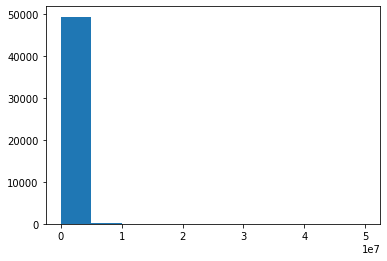

In [149]:
import matplotlib.pyplot as plt



pd.options.display.float_format = '{:.2f}'.format


plt.hist(df['price_cleaned'])
plt.show()

In [150]:
df[['location', 'bill', 'mortgage', 'object_type', 'city', 'price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
count,49607.00,40670.00,46630.00,32315.00,32315.00,32315.00
mean,276112.84,3.05,279.26,7.40,12.66,0.60
std,769274.62,1.49,9532.45,4.82,5.64,0.27
min,82.00,1.00,0.10,1.00,1.00,0.03
1%,19812.00,1.00,31.00,1.00,2.00,0.11
10%,65000.00,2.00,52.00,2.00,5.00,0.21
20%,85000.00,2.00,65.00,3.00,6.00,0.33
30%,107000.00,2.00,75.00,4.00,9.00,0.41
40%,125000.00,3.00,87.90,5.00,10.00,0.50
50%,150000.00,3.00,100.00,6.00,14.00,0.60


In [152]:
df['bill']

0        Kupça yoxdur
1           Kupça var
2        Kupça yoxdur
3        Kupça yoxdur
4        Kupça yoxdur
             ...     
49602    Kupça yoxdur
49603    Kupça yoxdur
49604    Kupça yoxdur
49605       Kupça var
49606       Kupça var
Name: bill, Length: 49607, dtype: object

In [167]:
df['bill_num'] =  df['bill'].apply(lambda x: 1 if x == 'Kupça var' else 0)

In [169]:
df['mortgage_num'] = df['mortgage'].apply(lambda x: 1 if x == 'İpoteka var' else 0)

In [170]:
df

,location,bill,mortgage,price,rooms,size,floor,object_type,page_number,time_posted,...,size_cleaned,floor_current,floor_max,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio,bill_num,mortgage_num
0,Qara Qarayev m.,Kupça yoxdur,İpoteka yoxdur,105 000AZN,2 otaqlı,51 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",...,51,11,18,2.00,51.00,11.00,18.00,0.61,0,0
1,Həzi Aslanov q.,Kupça var,İpoteka var,89 999AZN,2 otaqlı,61 m²,11/18 mərtəbə,menziller,1,"Bakı, 17 i̇yun 2022",...,61,11,18,2.00,61.00,11.00,18.00,0.61,1,1
2,Memar Əcəmi m.,Kupça yoxdur,İpoteka yoxdur,71 500AZN,1 otaqlı,55 m²,17/17 mərtəbə,menziller,1,"Bakı, bugün 12:09",...,55,17,17,1.00,55.00,17.00,17.00,1.00,0,0
3,7-ci mikrorayon q.,Kupça yoxdur,İpoteka yoxdur,124 337AZN,3 otaqlı,99.5 m²,6/9 mərtəbə,menziller,1,"Bakı, bugün 13:42",...,99.5,6,9,3.00,99.50,6.00,9.00,0.67,0,0
4,Bakı,Kupça yoxdur,İpoteka yoxdur,89 262AZN,2 otaqlı,71.4 m²,,menziller,1,"Bakı, 08 i̇yun 2022",...,71.4,,None,2.00,71.40,nan,nan,nan,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,Kupça yoxdur,İpoteka yoxdur,140 000AZN,4 otaqlı,147 m²,5/22 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",...,147,5,22,4.00,147.00,5.00,22.00,0.23,0,0
49603,Nizami m.,Kupça yoxdur,İpoteka yoxdur,235 000AZN,3 otaqlı,128 m²,6/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",...,128,6,16,3.00,128.00,6.00,16.00,0.38,0,0
49604,İnşaatçılar m.,Kupça yoxdur,İpoteka yoxdur,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",...,115,11,16,3.00,115.00,11.00,16.00,0.69,0,0
49605,İnşaatçılar m.,Kupça var,İpoteka var,185 000AZN,3 otaqlı,115 m²,11/16 mərtəbə,menziller/yeni-tikili,394,"Bakı, 09 i̇yun 2022",...,115,11,16,3.00,115.00,11.00,16.00,0.69,1,1


In [172]:
df[['location', 'bill_num', 'mortgage_num',  'price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
count,49607.00,49607.00,49607.00,40670.00,46630.00,32315.00,32315.00,32315.00
mean,0.73,0.15,276112.84,3.05,279.26,7.40,12.66,0.60
std,0.44,0.36,769274.62,1.49,9532.45,4.82,5.64,0.27
min,0.00,0.00,82.00,1.00,0.10,1.00,1.00,0.03
1%,0.00,0.00,19812.00,1.00,31.00,1.00,2.00,0.11
10%,0.00,0.00,65000.00,2.00,52.00,2.00,5.00,0.21
20%,0.00,0.00,85000.00,2.00,65.00,3.00,6.00,0.33
30%,1.00,0.00,107000.00,2.00,75.00,4.00,9.00,0.41
40%,1.00,0.00,125000.00,3.00,87.90,5.00,10.00,0.50
50%,1.00,0.00,150000.00,3.00,100.00,6.00,14.00,0.60


In [176]:
df[['location', 'city', 'object_type', 'bill_num', 'mortgage_num',  'price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']]

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,Qara Qarayev m.,baki,menziller,0,0,105000,2.00,51.00,11.00,18.00,0.61
1,Həzi Aslanov q.,baki,menziller,1,1,89999,2.00,61.00,11.00,18.00,0.61
2,Memar Əcəmi m.,baki,menziller,0,0,71500,1.00,55.00,17.00,17.00,1.00
3,7-ci mikrorayon q.,baki,menziller,0,0,124337,3.00,99.50,6.00,9.00,0.67
4,Bakı,baki,menziller,0,0,89262,2.00,71.40,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,baki,menziller/yeni-tikili,0,0,140000,4.00,147.00,5.00,22.00,0.23
49603,Nizami m.,baki,menziller/yeni-tikili,0,0,235000,3.00,128.00,6.00,16.00,0.38
49604,İnşaatçılar m.,baki,menziller/yeni-tikili,0,0,185000,3.00,115.00,11.00,16.00,0.69
49605,İnşaatçılar m.,baki,menziller/yeni-tikili,1,1,185000,3.00,115.00,11.00,16.00,0.69


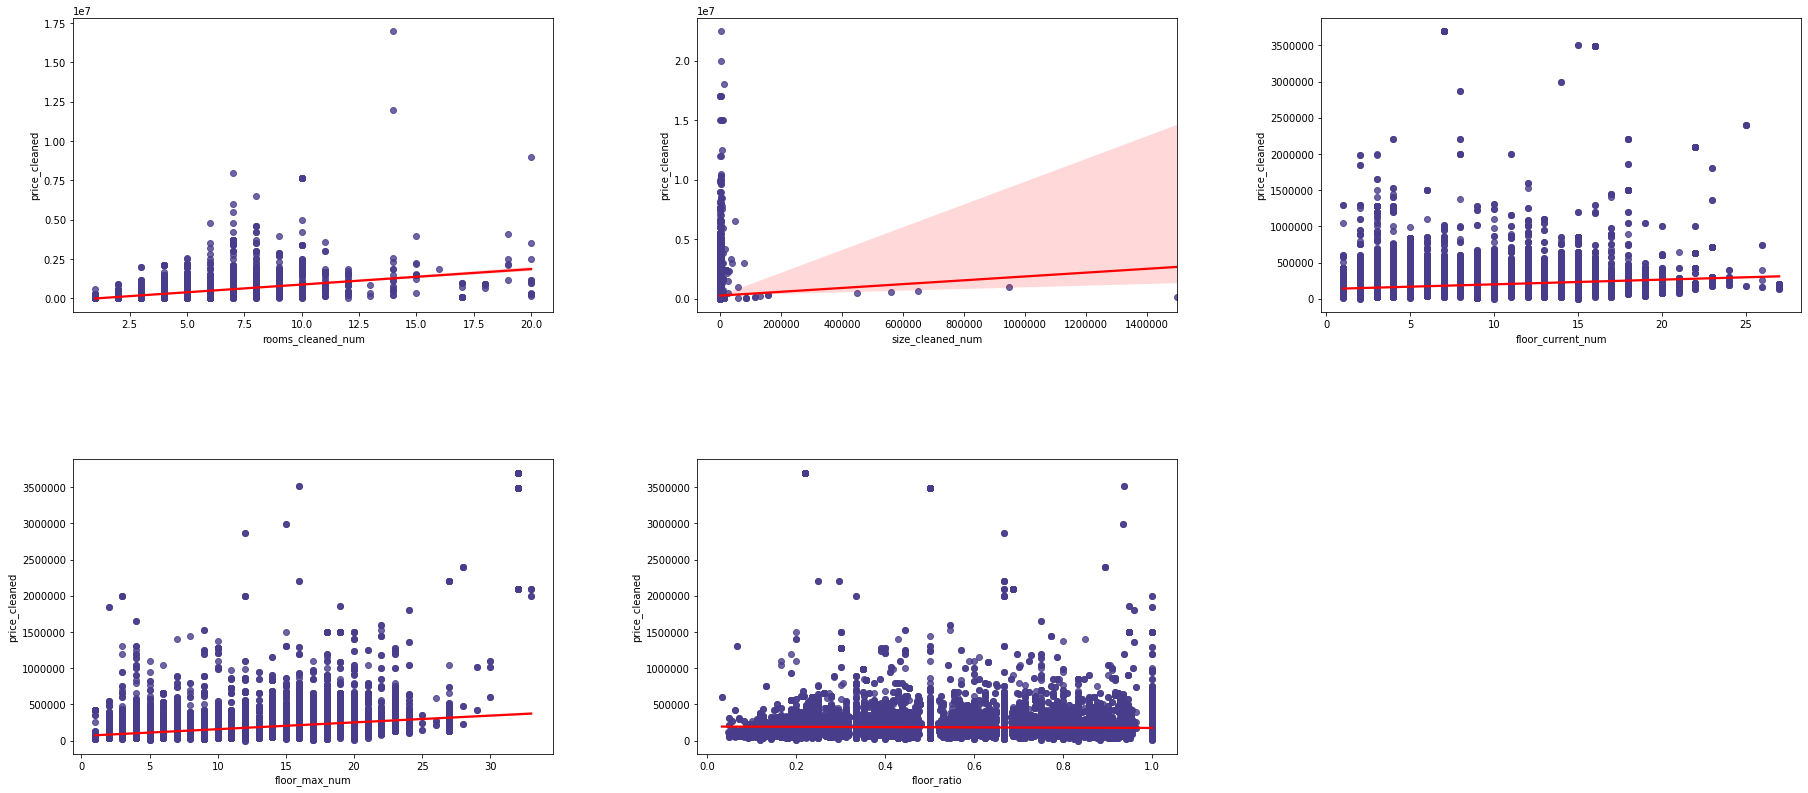

In [180]:
import seaborn as sns

fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df[[ 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']].columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= 'price_cleaned', data=df[['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']], scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})
        
        
        
        

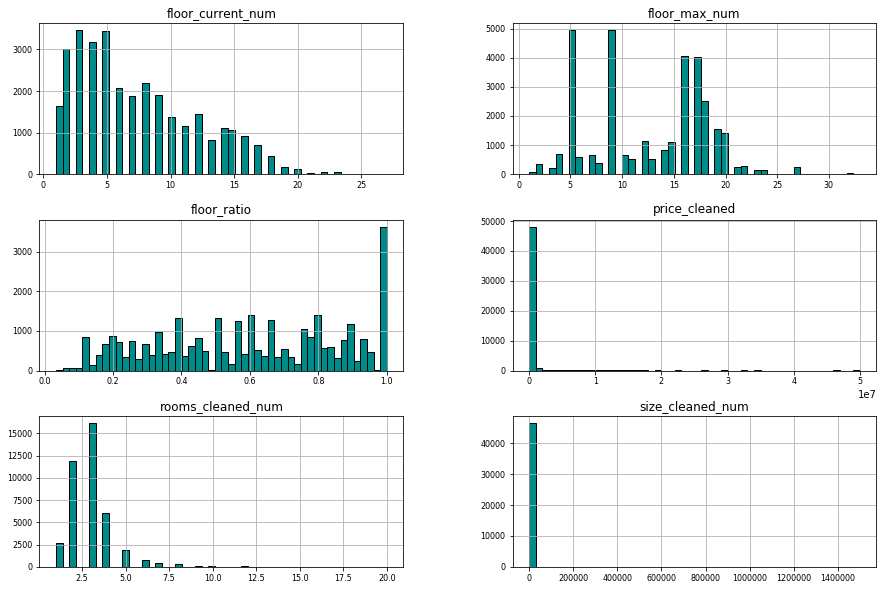

In [181]:
import matplotlib.pyplot as plt

fig_ = df[['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 
       'floor_ratio']].hist(figsize=(15, 10), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

plt.show()

In [182]:
df[['location', 'city', 'object_type', 'bill_num', 'mortgage_num',  
    'price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio']].to_csv('all_house_data_baku_cleaned.csv', index=False, encoding='utf-8')





In [185]:
df[['price_cleaned','location', 'city', 'object_type', 'bill_num', 
    'mortgage_num', 'rooms_cleaned_num', 'size_cleaned_num',
    'floor_current_num', 'floor_max_num', 'floor_ratio']].corr()

,price_cleaned,bill_num,mortgage_num,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
price_cleaned,1.00,0.08,0.03,0.50,0.03,0.17,0.28,-0.03
bill_num,0.08,1.00,0.19,0.13,0.01,-0.13,-0.23,0.04
mortgage_num,0.03,0.19,1.00,-0.01,-0.00,0.07,0.08,0.00
rooms_cleaned_num,0.50,0.13,-0.01,1.00,0.05,0.08,0.09,0.03
size_cleaned_num,0.03,0.01,-0.00,0.05,1.00,0.02,0.03,-0.00
floor_current_num,0.17,-0.13,0.07,0.08,0.02,1.00,0.65,0.61
floor_max_num,0.28,-0.23,0.08,0.09,0.03,0.65,1.00,-0.11
floor_ratio,-0.03,0.04,0.00,0.03,-0.00,0.61,-0.11,1.00


In [187]:
df_num = df[['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
    'floor_current_num', 'floor_max_num', 'floor_ratio']].corr()

In [190]:
df_num

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
price_cleaned,1.00,0.50,0.03,0.17,0.28,-0.03
rooms_cleaned_num,0.50,1.00,0.05,0.08,0.09,0.03
size_cleaned_num,0.03,0.05,1.00,0.02,0.03,-0.00
floor_current_num,0.17,0.08,0.02,1.00,0.65,0.61
floor_max_num,0.28,0.09,0.03,0.65,1.00,-0.11
floor_ratio,-0.03,0.03,-0.00,0.61,-0.11,1.00


In [2]:
import pandas as pd

df = pd.read_csv('all_house_data_baku_cleaned.csv')

In [3]:
df.dtypes

location              object
city                  object
object_type           object
bill_num               int64
mortgage_num           int64
price_cleaned          int64
rooms_cleaned_num    float64
size_cleaned_num     float64
floor_current_num    float64
floor_max_num        float64
floor_ratio          float64
dtype: object

## correlation matrix

(6.0, 0.0)

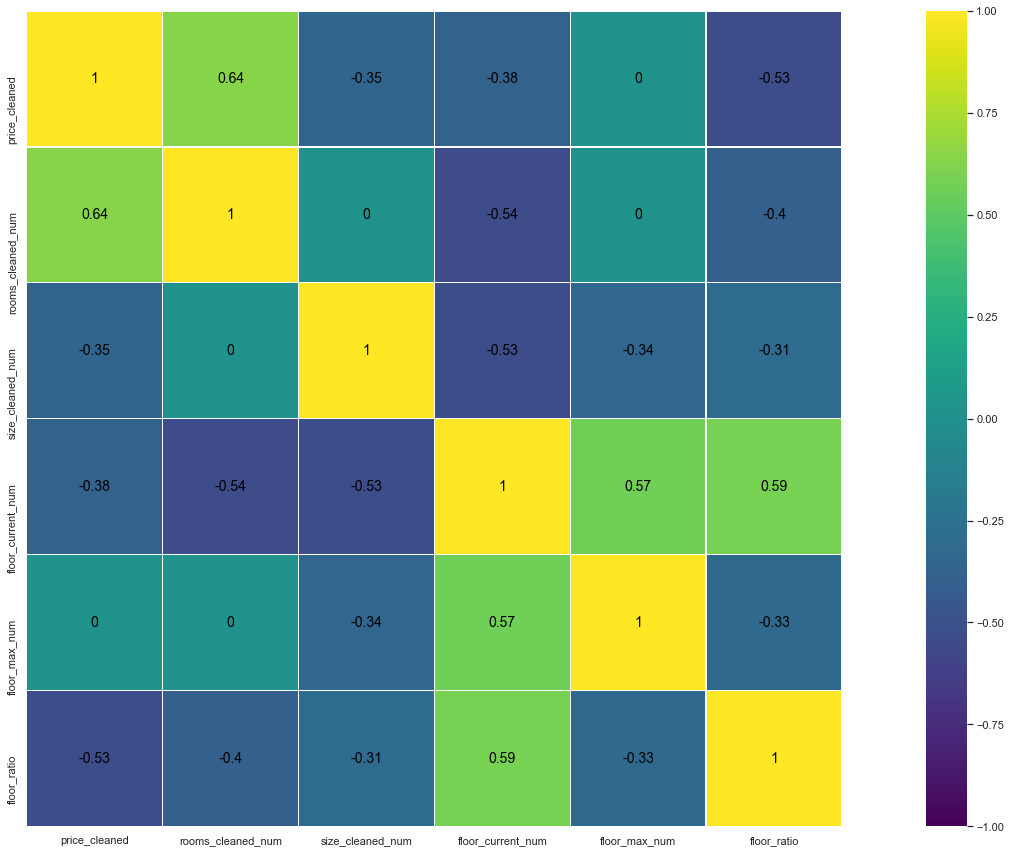

In [236]:
# Define correlation matrix 
# (method = pearson: standard correlation coefficient)

import numpy as np
fig = plt.figure(figsize=(30, 15))


corr_matrix = df_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
ax = sns.heatmap(corr_matrix,  vmax=1.0, vmin=-1.0, linewidths=0.5,
            annot_kws={"size": 14, "color": "black"}, square=True, cmap=cmap, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [251]:
df_num

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
price_cleaned,1.00,0.50,0.03,0.17,0.28,-0.03
rooms_cleaned_num,0.50,1.00,0.05,0.08,0.09,0.03
size_cleaned_num,0.03,0.05,1.00,0.02,0.03,-0.00
floor_current_num,0.17,0.08,0.02,1.00,0.65,0.61
floor_max_num,0.28,0.09,0.03,0.65,1.00,-0.11
floor_ratio,-0.03,0.03,-0.00,0.61,-0.11,1.00


In [241]:
df_num_corr

price_cleaned        1.00
rooms_cleaned_num    0.64
size_cleaned_num    -0.35
floor_current_num   -0.38
floor_max_num        0.11
Name: price_cleaned, dtype: float64

In [4]:
df_numerical = df[['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
    'floor_current_num', 'floor_max_num', 'floor_ratio']]

In [271]:
 df_num_corr = df_numerical.corr()["price_cleaned"]

In [272]:
df[['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
    'floor_current_num', 'floor_max_num', 'floor_ratio']].corr()

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
price_cleaned,1.00,0.50,0.03,0.17,0.28,-0.03
rooms_cleaned_num,0.50,1.00,0.05,0.08,0.09,0.03
size_cleaned_num,0.03,0.05,1.00,0.02,0.03,-0.00
floor_current_num,0.17,0.08,0.02,1.00,0.65,0.61
floor_max_num,0.28,0.09,0.03,0.65,1.00,-0.11
floor_ratio,-0.03,0.03,-0.00,0.61,-0.11,1.00


In [281]:
df_num_corr

price_cleaned        1.00
rooms_cleaned_num    0.50
size_cleaned_num     0.03
floor_current_num    0.17
floor_max_num        0.28
floor_ratio         -0.03
Name: price_cleaned, dtype: float64

In [280]:
 df_numerical.loc[:, moderate_features]

,rooms_cleaned_num,floor_current_num,floor_max_num,price_cleaned
0,2.00,11.00,18.00,105000
1,2.00,11.00,18.00,89999
2,1.00,17.00,17.00,71500
3,3.00,6.00,9.00,124337
4,2.00,nan,nan,89262
...,...,...,...,...
49602,4.00,5.00,22.00,140000
49603,3.00,6.00,16.00,235000
49604,3.00,11.00,16.00,185000
49605,3.00,11.00,16.00,185000


## these are moderately correlated variables

5 moderately correlated values with Sales Price:
rooms_cleaned_num    0.50
floor_max_num        0.28
floor_current_num    0.17
size_cleaned_num     0.03
floor_ratio         -0.03
Name: price_cleaned, dtype: float64



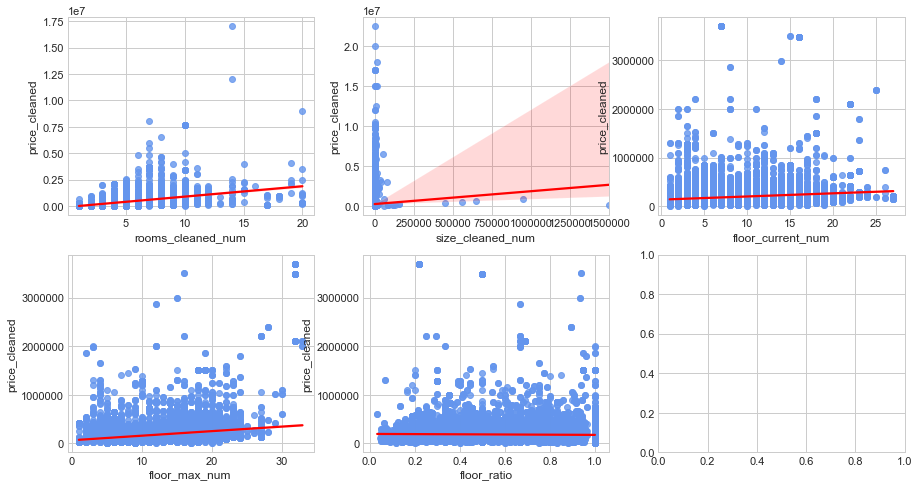

In [283]:
######################################


# Correlated features (0.1 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= -0.03)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with Sales Price:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= -0.03)].index.tolist()
moderate_features.append("price_cleaned")

df_moderate_features = df_numerical.loc[:, moderate_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(moderate_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with Sale Price
    if i < len(moderate_features)-1:
        sns.regplot(x=moderate_features[i], y="price_cleaned", data=df_moderate_features, ax=ax, scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})
        
        
        

## cleaning data with of the distance algorithm

In [284]:
df_numerical

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,105000,2.00,51.00,11.00,18.00,0.61
1,89999,2.00,61.00,11.00,18.00,0.61
2,71500,1.00,55.00,17.00,17.00,1.00
3,124337,3.00,99.50,6.00,9.00,0.67
4,89262,2.00,71.40,nan,nan,nan
...,...,...,...,...,...,...
49602,140000,4.00,147.00,5.00,22.00,0.23
49603,235000,3.00,128.00,6.00,16.00,0.38
49604,185000,3.00,115.00,11.00,16.00,0.69
49605,185000,3.00,115.00,11.00,16.00,0.69


In [291]:
df_numerical[['rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio', 'price_cleaned']].iloc[:, :-1]

,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,2.00,51.00,11.00,18.00,0.61
1,2.00,61.00,11.00,18.00,0.61
2,1.00,55.00,17.00,17.00,1.00
3,3.00,99.50,6.00,9.00,0.67
4,2.00,71.40,nan,nan,nan
...,...,...,...,...,...
49602,4.00,147.00,5.00,22.00,0.23
49603,3.00,128.00,6.00,16.00,0.38
49604,3.00,115.00,11.00,16.00,0.69
49605,3.00,115.00,11.00,16.00,0.69


In [300]:
df_numerical[[col, 'price_cleaned']]

,floor_ratio,price_cleaned
0,0.61,105000
1,0.61,89999
2,1.00,71500
3,0.67,124337
4,nan,89262
...,...,...
49602,0.23,140000
49603,0.38,235000
49604,0.69,185000
49605,0.69,185000


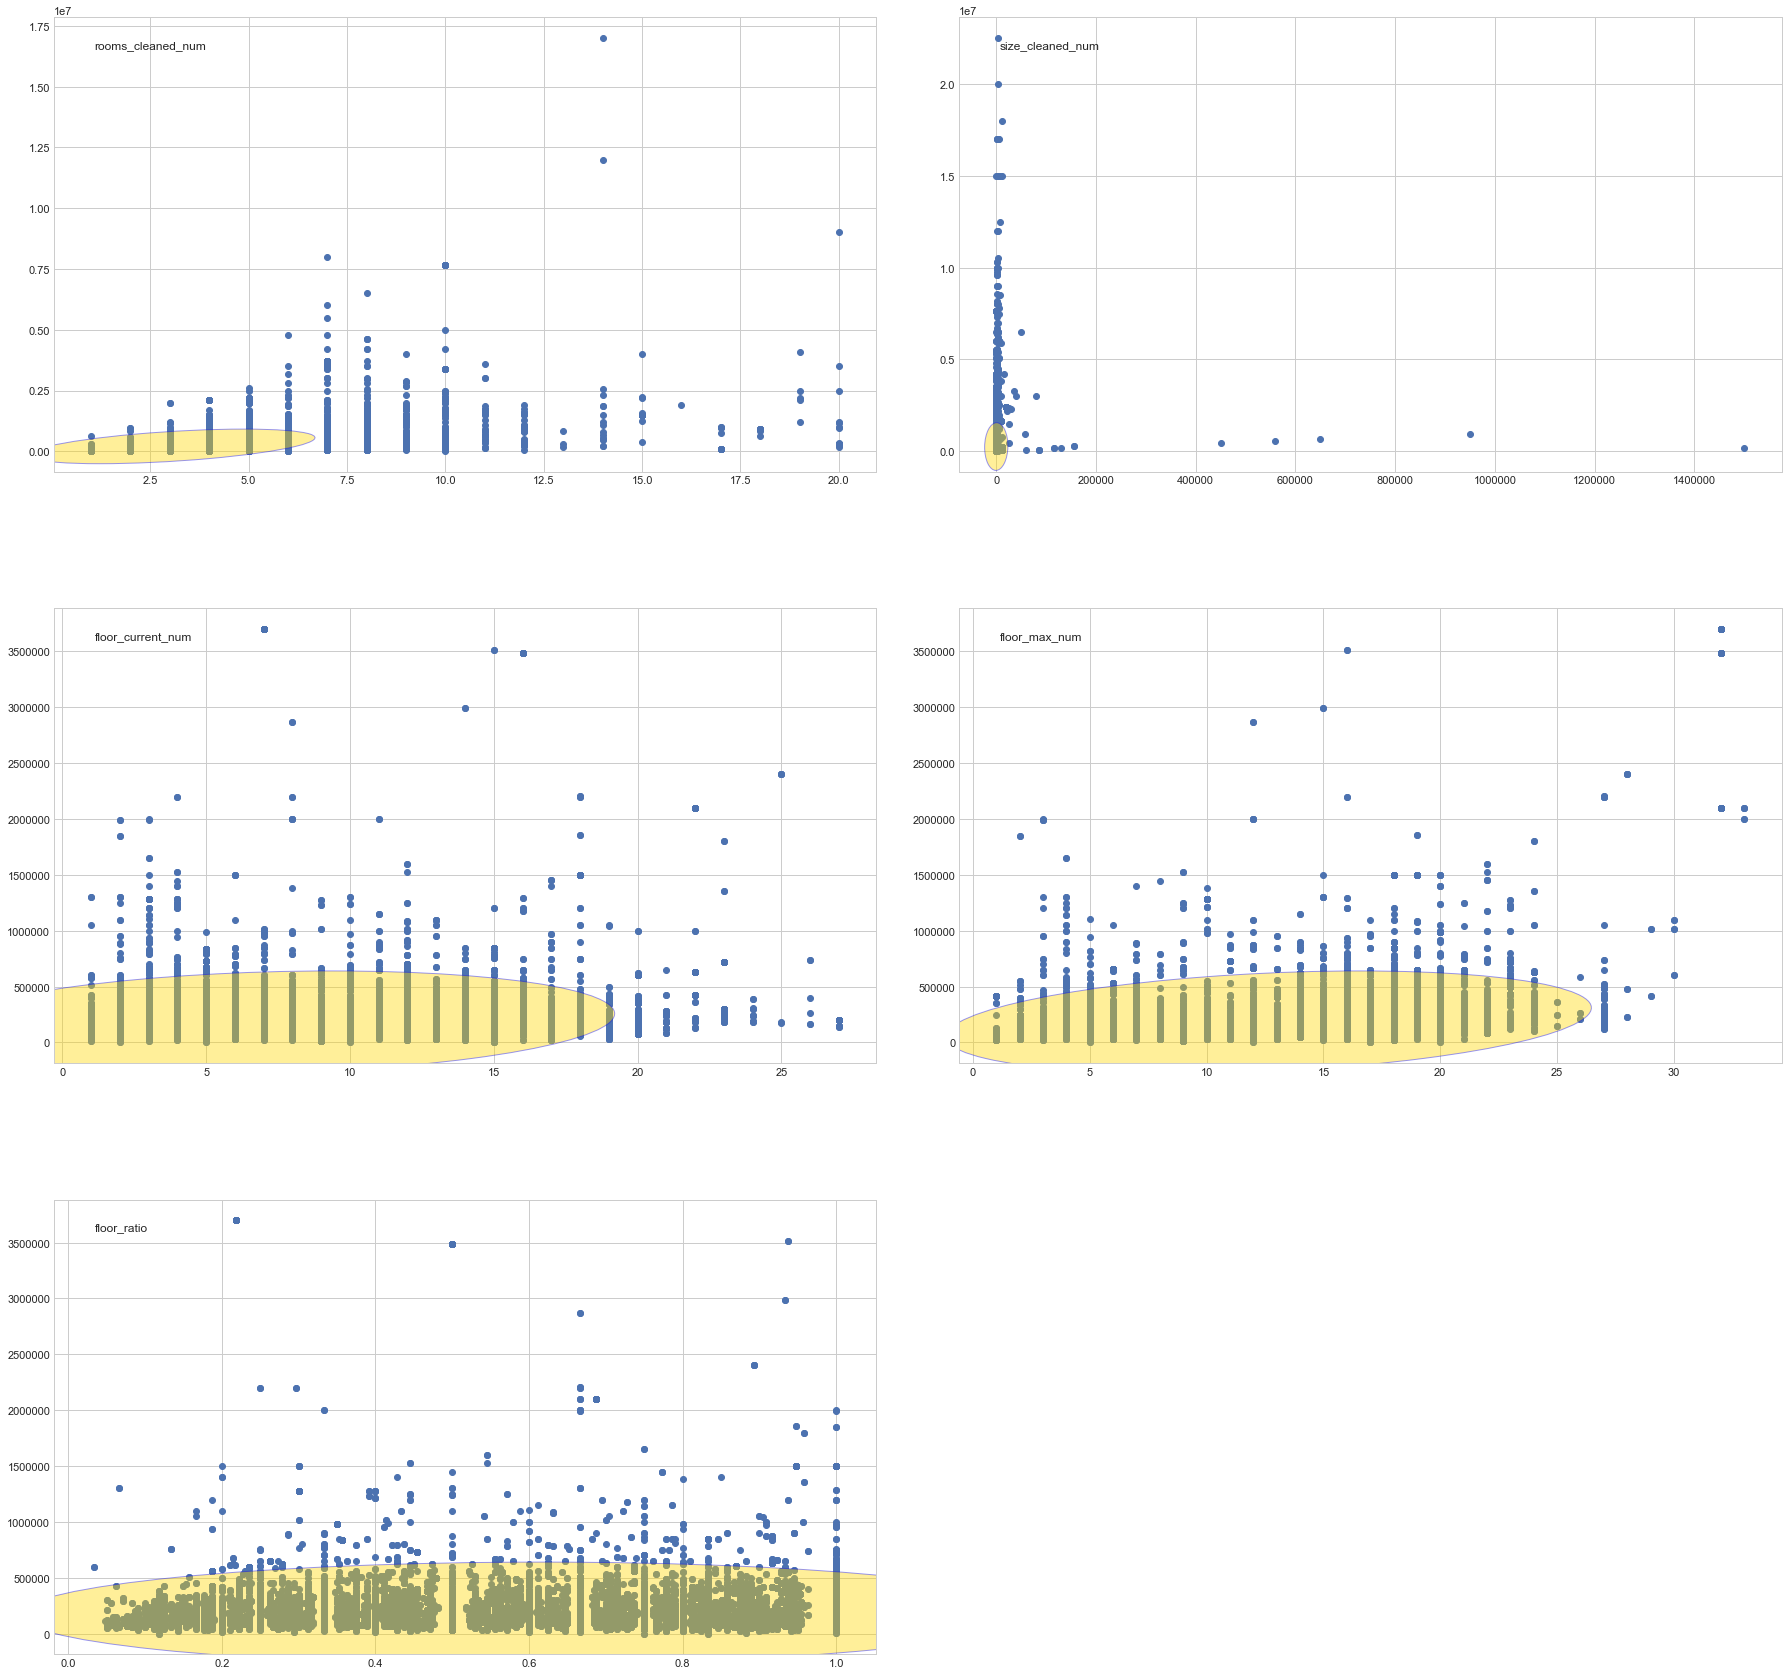

In [299]:
# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import matplotlib.pyplot as plt
from matplotlib import patches

fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 



for i, col in enumerate(df_numerical[['rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio', 'price_cleaned']].iloc[:, :-1].columns):
    df = df_numerical[[col, 'price_cleaned']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    
    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    
    # Center point
    centerpoint = np.mean(df , axis=0)

    
    # Distances between center point and 
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    
    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

  

    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
    
    # Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(9, 2, i+1)
    ax.add_artist(ellipse)
    
    
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

## handling missing values

In [301]:
df_numerical

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,105000,2.00,51.00,11.00,18.00,0.61
1,89999,2.00,61.00,11.00,18.00,0.61
2,71500,1.00,55.00,17.00,17.00,1.00
3,124337,3.00,99.50,6.00,9.00,0.67
4,89262,2.00,71.40,nan,nan,nan
...,...,...,...,...,...,...
49602,140000,4.00,147.00,5.00,22.00,0.23
49603,235000,3.00,128.00,6.00,16.00,0.38
49604,185000,3.00,115.00,11.00,16.00,0.69
49605,185000,3.00,115.00,11.00,16.00,0.69


Text(0, 0.5, 'Column Name\n')

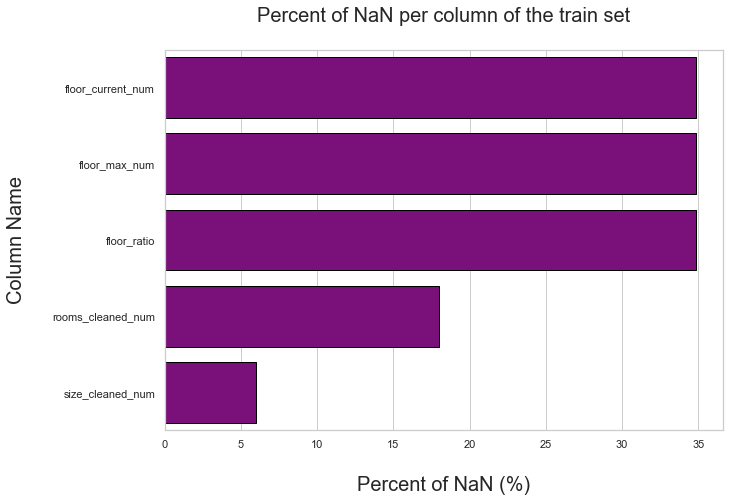

In [302]:

# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_numerical.columns[df_numerical.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_numerical[i].isnull().sum()*100/len(df_numerical), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

## fill in missing values

In [8]:
# Imputation of missing values (NaNs) with SimpleImputer

from sklearn.impute import SimpleImputer


my_imputer = SimpleImputer(strategy="median")
df_num_imputed = pd.DataFrame(my_imputer.fit_transform(df_numerical))
df_num_imputed.columns = df_numerical.columns

In [305]:
df_num_imputed.columns 

Index(['price_cleaned', 'rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio'],
      dtype='object')

In [308]:

pip install -U seaborn


     |████████████████████████████████| 292 kB 2.1 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
df_numerical

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,105000,2.0,51.0,11.0,18.0,0.611111
1,89999,2.0,61.0,11.0,18.0,0.611111
2,71500,1.0,55.0,17.0,17.0,1.000000
3,124337,3.0,99.5,6.0,9.0,0.666667
4,89262,2.0,71.4,NaN,NaN,NaN
...,...,...,...,...,...,...
49602,140000,4.0,147.0,5.0,22.0,0.227273
49603,235000,3.0,128.0,6.0,16.0,0.375000
49604,185000,3.0,115.0,11.0,16.0,0.687500
49605,185000,3.0,115.0,11.0,16.0,0.687500


In [15]:
df_num_imputed

,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,105000.0,2.0,51.0,11.0,18.0,0.611111
1,89999.0,2.0,61.0,11.0,18.0,0.611111
2,71500.0,1.0,55.0,17.0,17.0,1.000000
3,124337.0,3.0,99.5,6.0,9.0,0.666667
4,89262.0,2.0,71.4,6.0,14.0,0.600000
...,...,...,...,...,...,...
49602,140000.0,4.0,147.0,5.0,22.0,0.227273
49603,235000.0,3.0,128.0,6.0,16.0,0.375000
49604,185000.0,3.0,115.0,11.0,16.0,0.687500
49605,185000.0,3.0,115.0,11.0,16.0,0.687500


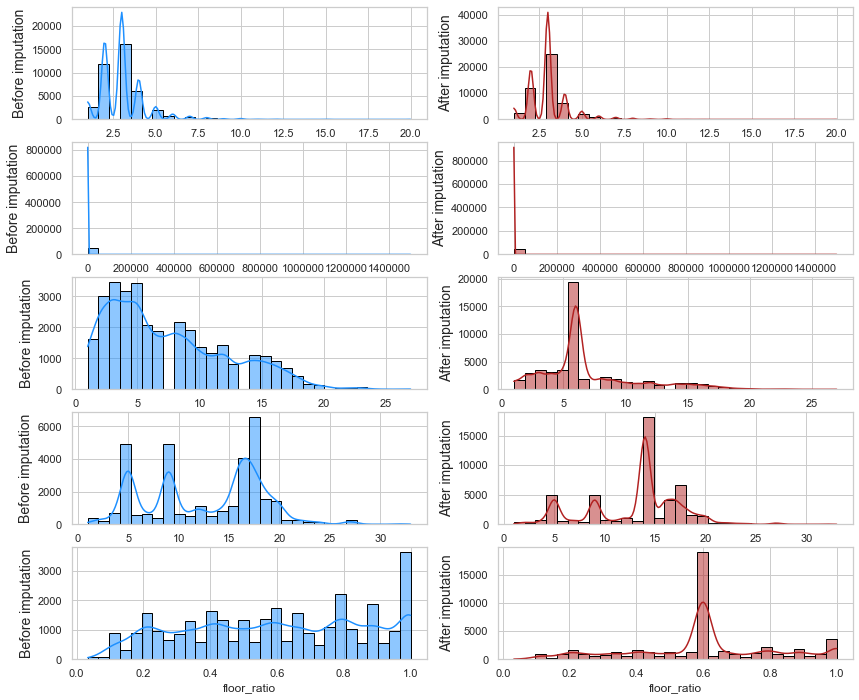

In [22]:
# Define figure parameters
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(['rooms_cleaned_num', 'size_cleaned_num',
       'floor_current_num', 'floor_max_num', 'floor_ratio'], [0, 1, 2, 3, 4]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_numerical[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)


    
    
    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_num_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)
    
   

In [14]:
sns.__version__


'0.11.2'

## categorical variables

In [25]:
df_categ = df[['location', 'city', 'object_type', 'bill_num', 'mortgage_num']]


In [36]:
df_categ.columns[4]

'mortgage_num'

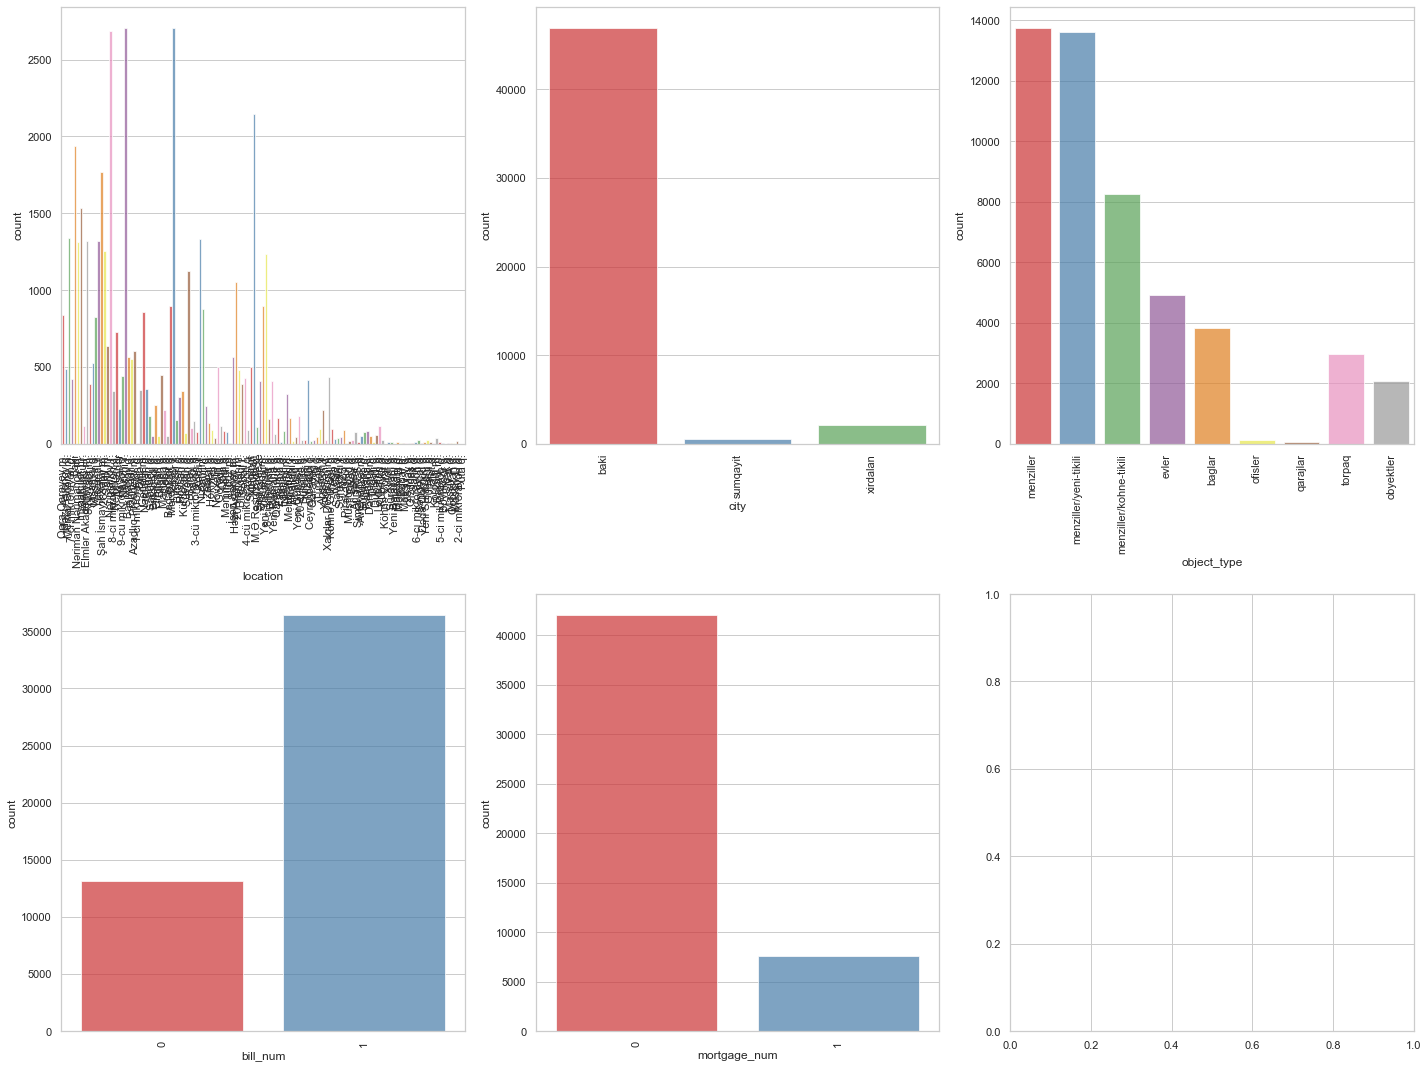

In [38]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 3), 3, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax, palette = "Set1")

fig.tight_layout()

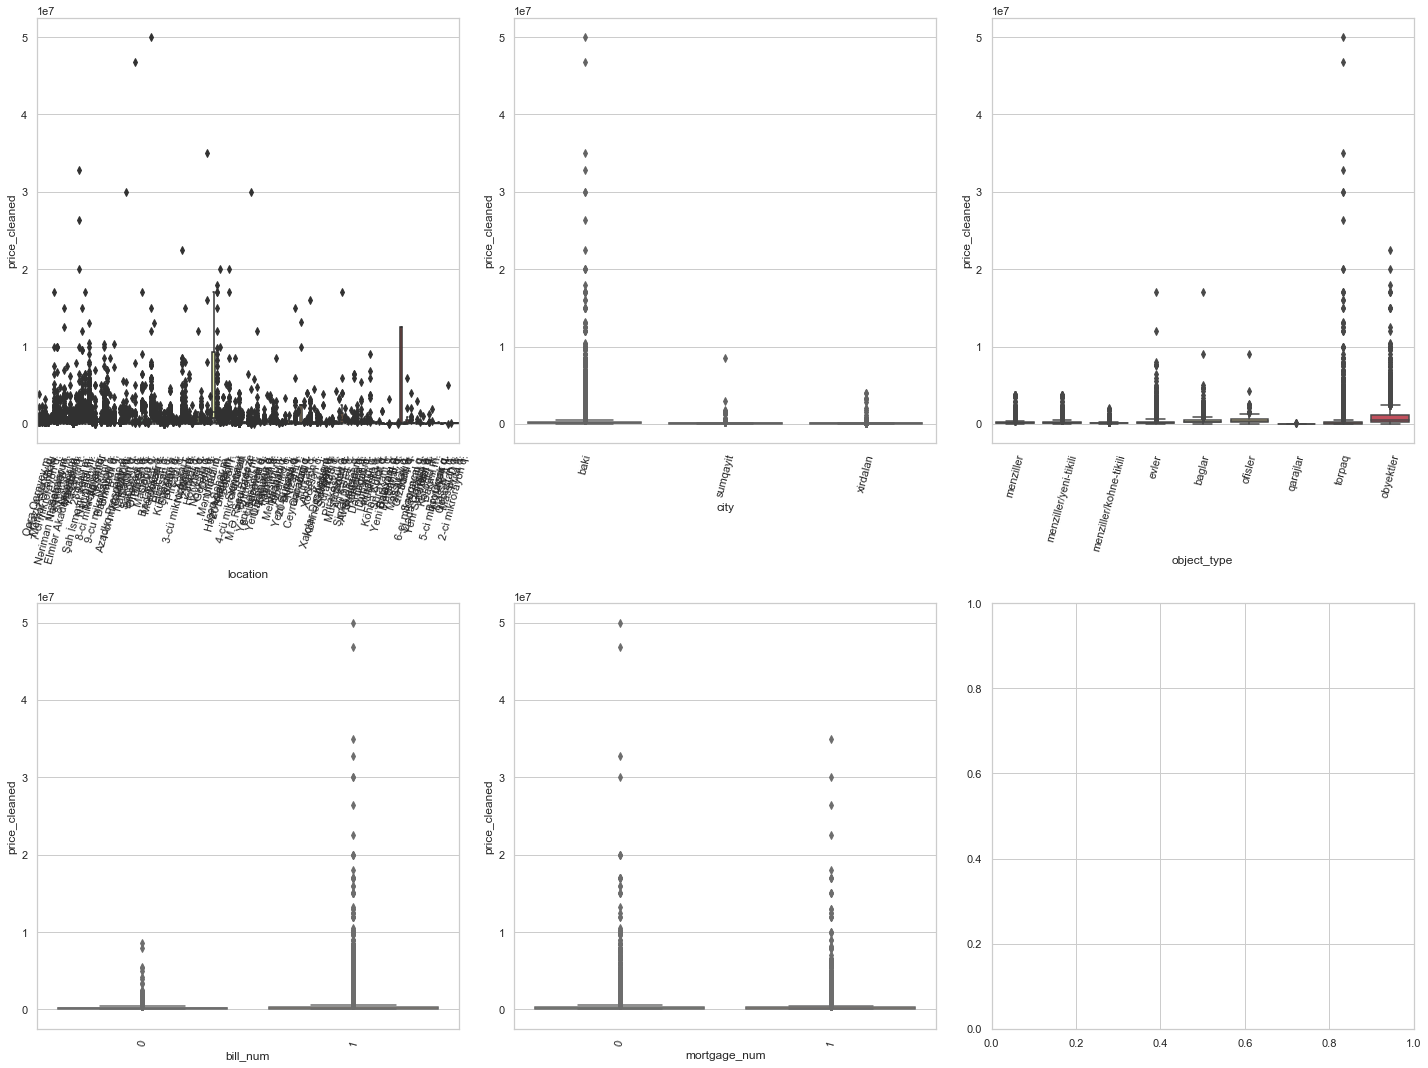

In [58]:
pd.options.display.float_format = '{:.2f}'.format

fig, axes = plt.subplots(
    round(len(df_categ.columns)/3), 3, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categ.columns[i], y="price_cleaned", data=df, ax=ax, palette="Spectral_r")
        
plt.ticklabel_format(style='plain', axis='y')

fig.tight_layout()

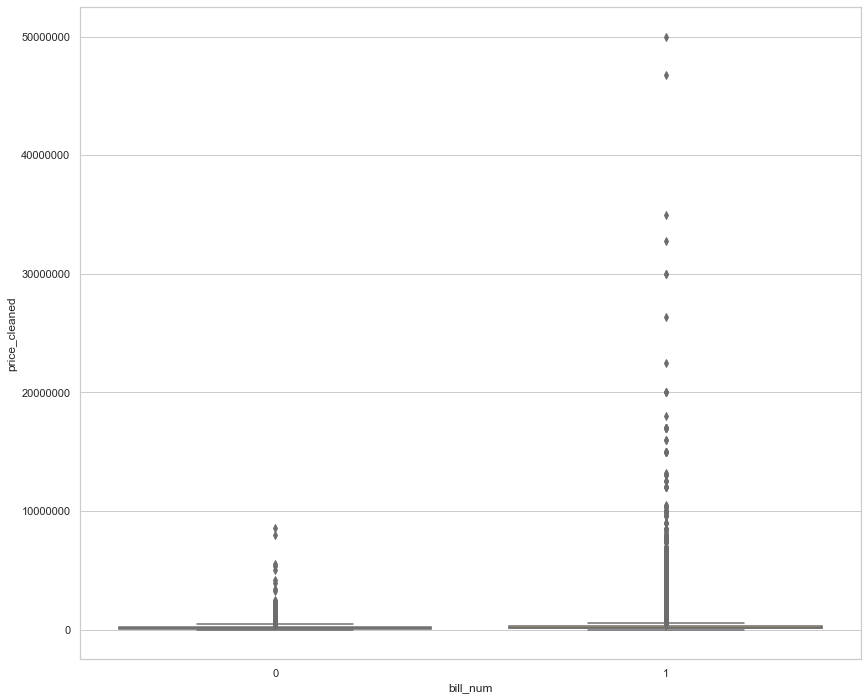

In [56]:
sns.boxplot(x=df_categ['bill_num'], y="price_cleaned", data=df, palette="Spectral_r")
    
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## the problem is that there are a lot of outliers. I need find a good way to drop these outliers

In [62]:
df['price_cleaned'].quantile(.99)

2400000.0

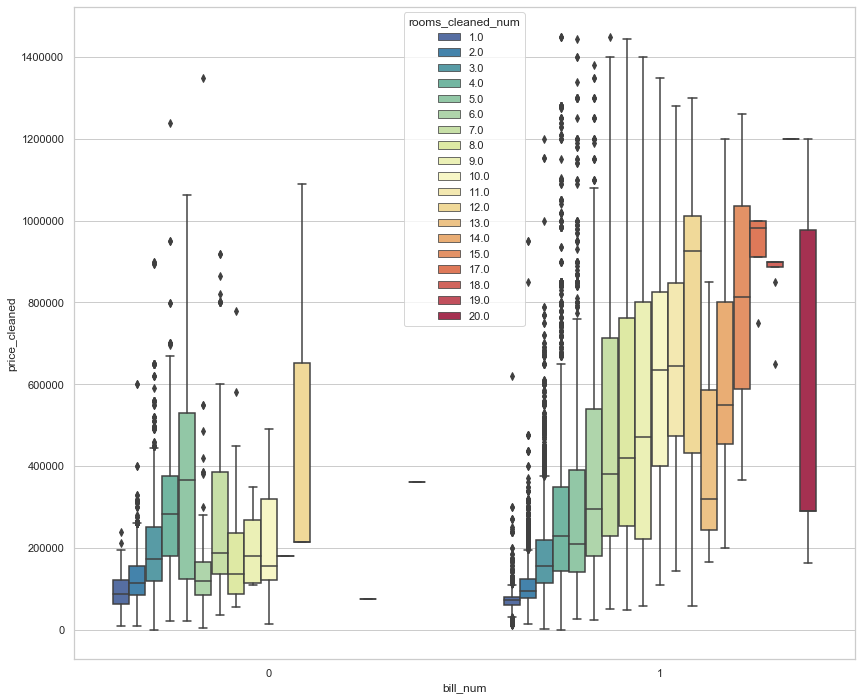

In [69]:
sns.boxplot(x=df_categ['bill_num'][df['price_cleaned'] <= df['price_cleaned'].quantile(.98)], 
            y="price_cleaned", data=df[df['price_cleaned'] <= df['price_cleaned'].quantile(.98)], palette="Spectral_r", 
            hue = df['rooms_cleaned_num'][df['price_cleaned'] <= df['price_cleaned'].quantile(.98)])
    
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [70]:
df

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,Qara Qarayev m.,baki,menziller,0,0,105000,2.00,51.00,11.00,18.00,0.61
1,Həzi Aslanov q.,baki,menziller,1,1,89999,2.00,61.00,11.00,18.00,0.61
2,Memar Əcəmi m.,baki,menziller,0,0,71500,1.00,55.00,17.00,17.00,1.00
3,7-ci mikrorayon q.,baki,menziller,0,0,124337,3.00,99.50,6.00,9.00,0.67
4,Bakı,baki,menziller,0,0,89262,2.00,71.40,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
49602,Yasamal q.,baki,menziller/yeni-tikili,0,0,140000,4.00,147.00,5.00,22.00,0.23
49603,Nizami m.,baki,menziller/yeni-tikili,0,0,235000,3.00,128.00,6.00,16.00,0.38
49604,İnşaatçılar m.,baki,menziller/yeni-tikili,0,0,185000,3.00,115.00,11.00,16.00,0.69
49605,İnşaatçılar m.,baki,menziller/yeni-tikili,1,1,185000,3.00,115.00,11.00,16.00,0.69


## remove outliers with the mean-std method

In [71]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


# calculate summary statistics
data_mean, data_std = mean(df['price_cleaned']), std(df['price_cleaned'])


In [79]:
# identify outliers
cut_off = data_std * 5
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in df['price_cleaned'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['price_cleaned'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 215
Non-outlier observations: 49392


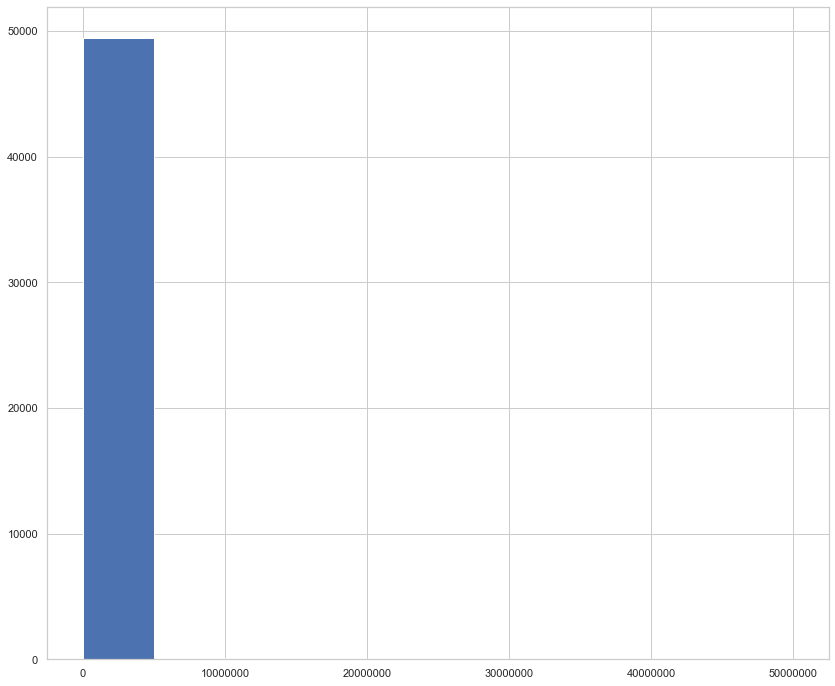

In [92]:
df['price_cleaned'].hist()

plt.ticklabel_format(style='plain', axis='x')

In [97]:
df['price_cleaned'].quantile(0.95)

750000.0

In [104]:
df[(df['object_type'] == 'menziller') & (df['city'] == 'baki')]

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
0,Qara Qarayev m.,baki,menziller,0,0,105000,2.00,51.00,11.00,18.00,0.61
1,Həzi Aslanov q.,baki,menziller,1,1,89999,2.00,61.00,11.00,18.00,0.61
2,Memar Əcəmi m.,baki,menziller,0,0,71500,1.00,55.00,17.00,17.00,1.00
3,7-ci mikrorayon q.,baki,menziller,0,0,124337,3.00,99.50,6.00,9.00,0.67
4,Bakı,baki,menziller,0,0,89262,2.00,71.40,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
49570,Lökbatan q.,baki,menziller,1,0,95000,3.00,79.00,5.00,5.00,1.00
49571,Əhmədli m.,baki,menziller,1,0,85000,2.00,65.00,9.00,9.00,1.00
49572,Memar Əcəmi m.,baki,menziller,1,0,69000,2.00,50.00,2.00,5.00,0.40
49573,Yeni Yasamal q.,baki,menziller,1,0,84000,2.00,62.00,17.00,17.00,1.00


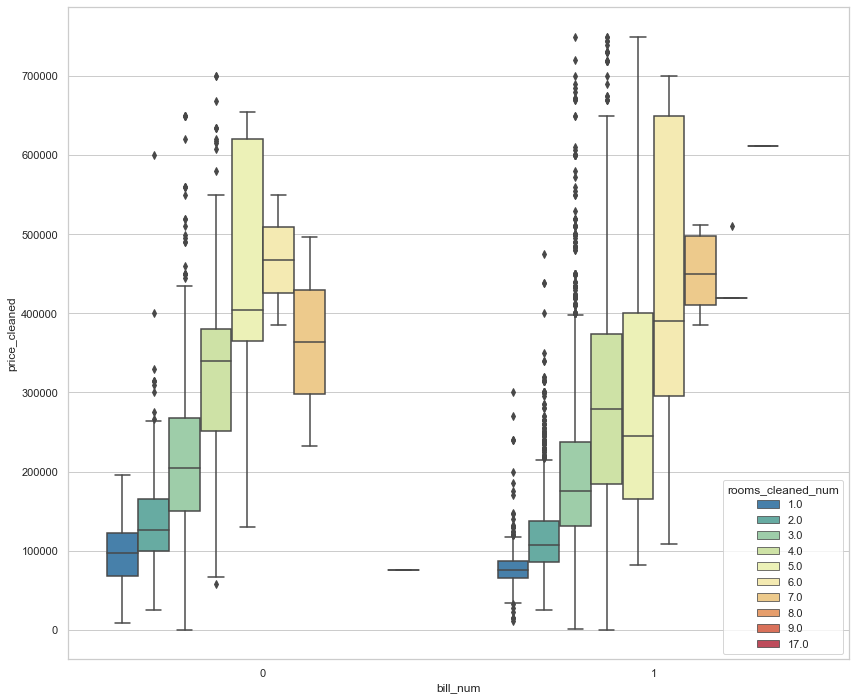

In [107]:
sns.boxplot(x=df_categ['bill_num'][(df['price_cleaned'] <= df['price_cleaned'].quantile(.95)) & (df['object_type'] == 'menziller') & 
                                   (df['city'] == 'baki')], 
            y="price_cleaned", data=df[(df['price_cleaned'] <= df['price_cleaned'].quantile(.95)) & (df['object_type'] == 'menziller') &
                                       (df['city'] == 'baki')], palette="Spectral_r", 
            
            hue = df['rooms_cleaned_num'][(df['price_cleaned'] <= df['price_cleaned'].quantile(.95)) & (df['object_type'] == 'menziller') & 
                                          (df['city'] == 'baki')])
    
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## There are a lot of outliers. I should still find a good way to exclude them

In [114]:
pd.DataFrame(df.groupby(['city', 'location', 'object_type','rooms_cleaned_num'])['price_cleaned'].mean()).head(15)

price_cleaned
city location           object_type            rooms_cleaned_num               
baki 1-ci mikrorayon q. menziller              3.00                   102000.00
                        menziller/kohne-tikili 2.00                    89000.00
                                               3.00                   102000.00
     2-ci mikrorayon q. menziller/kohne-tikili 2.00                    69500.00
     20 Yanvar m.       evler                  2.00                    49000.00
                                               5.00                   990000.00
                                               8.00                  1650000.00
                        menziller              1.00                    99571.43
                                               2.00                   107376.71
                                               3.00                   167357.53
                                               4.00                   186000.00
                                               5.00                   207800.00
                                               6.00                   310000.00
                        menziller/kohne-tikili 1.00                    64666.67
                                               2.00                    81240.74

In [120]:
df[(df['object_type'] == 'menziller') & (df['city'] == 'baki') & (df['rooms_cleaned_num'] > 6) ]

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
593,Nərimanov r.,baki,menziller,1,0,1500000,15.00,1000.00,18.00,18.00,1.00
7692,Nəsimi r.,baki,menziller,1,0,3700000,7.00,1009.00,7.00,32.00,0.22
8992,Elmlər Akademiyası m.,baki,menziller,1,0,420000,8.00,215.00,1.00,1.00,1.00
9512,Elmlər Akademiyası m.,baki,menziller,1,0,420000,8.00,215.00,1.00,1.00,1.00
11395,Nəriman Nərimanov m.,baki,menziller,1,0,1500000,15.00,1000.00,18.00,19.00,0.95
...,...,...,...,...,...,...,...,...,...,...,...
47432,Nəsimi r.,baki,menziller,1,0,3700000,7.00,1009.00,7.00,32.00,0.22
47815,Elmlər Akademiyası m.,baki,menziller,1,0,420000,8.00,215.00,1.00,1.00,1.00
48016,Şah İsmayıl Xətai m.,baki,menziller,1,0,2400000,10.00,1200.00,25.00,28.00,0.89
48519,Nəriman Nərimanov m.,baki,menziller,1,0,1500000,15.00,1000.00,18.00,19.00,0.95


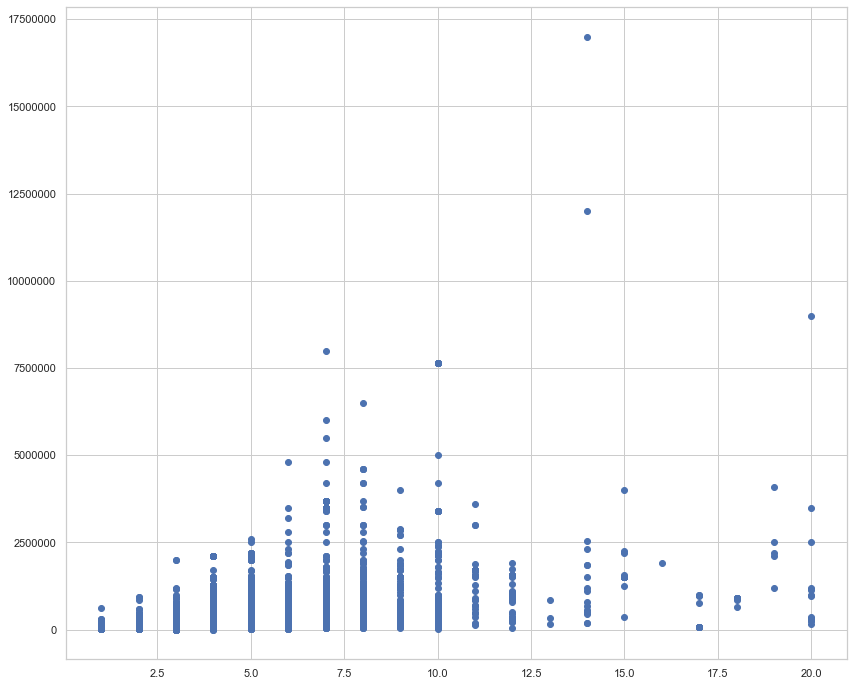

In [123]:
plt.scatter(x=df['rooms_cleaned_num'], y = df['price_cleaned'])

plt.ticklabel_format(style='plain', axis='y')

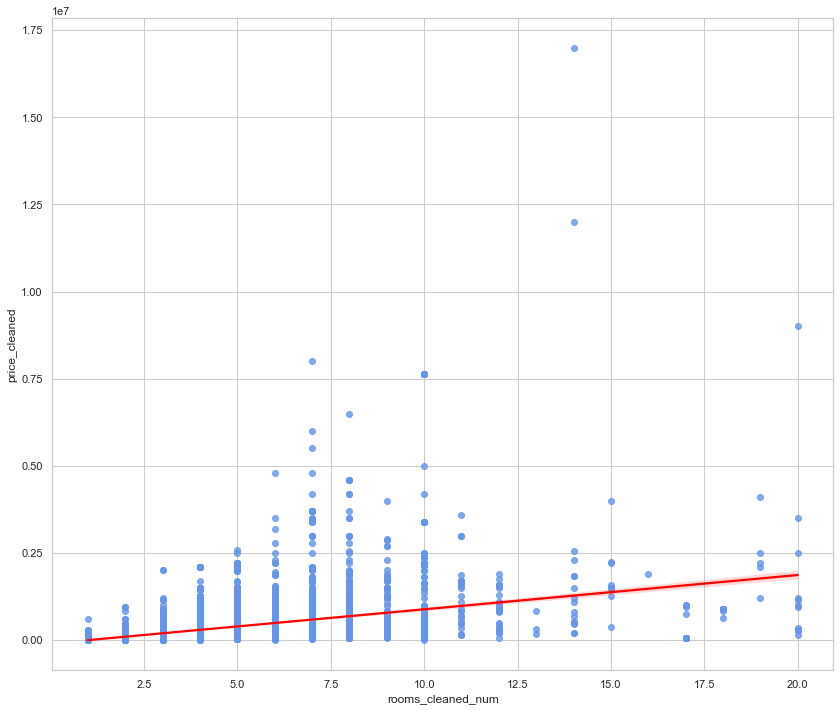

In [124]:
sns.regplot(x=df['rooms_cleaned_num'], y="price_cleaned", data=df,  scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})
        

In [127]:
df['rooms_cleaned_num'].describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

count   40670.00
mean        3.05
std         1.49
min         1.00
25%         2.00
50%         3.00
75%         3.00
80%         4.00
90%         4.00
95%         5.00
99%         8.00
max        20.00
Name: rooms_cleaned_num, dtype: float64

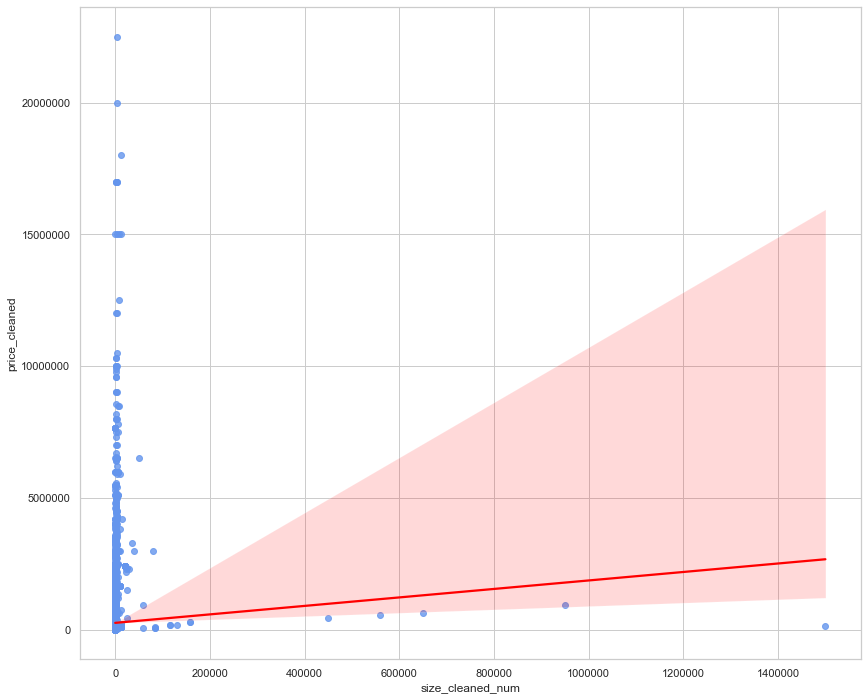

In [131]:
sns.regplot(x=df['size_cleaned_num'], y="price_cleaned", data=df,  scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})

plt.ticklabel_format(style='plain', axis='y')

In [132]:
df.corr()

,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
bill_num,1.00,0.19,0.08,0.13,0.01,-0.13,-0.23,0.04
mortgage_num,0.19,1.00,0.03,-0.01,-0.00,0.07,0.08,0.00
price_cleaned,0.08,0.03,1.00,0.50,0.03,0.17,0.28,-0.03
rooms_cleaned_num,0.13,-0.01,0.50,1.00,0.05,0.08,0.09,0.03
size_cleaned_num,0.01,-0.00,0.03,0.05,1.00,0.02,0.03,-0.00
floor_current_num,-0.13,0.07,0.17,0.08,0.02,1.00,0.65,0.61
floor_max_num,-0.23,0.08,0.28,0.09,0.03,0.65,1.00,-0.11
floor_ratio,0.04,0.00,-0.03,0.03,-0.00,0.61,-0.11,1.00


In [134]:
df.describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
count,49607.00,49607.00,49607.00,40670.00,46630.00,32315.00,32315.00,32315.00
mean,0.73,0.15,276112.84,3.05,279.26,7.40,12.66,0.60
std,0.44,0.36,769274.62,1.49,9532.45,4.82,5.64,0.27
min,0.00,0.00,82.00,1.00,0.10,1.00,1.00,0.03
25%,0.00,0.00,95000.00,2.00,70.00,3.00,9.00,0.38
50%,1.00,0.00,150000.00,3.00,100.00,6.00,14.00,0.60
75%,1.00,0.00,260000.00,3.00,154.60,11.00,17.00,0.82
80%,1.00,0.00,298000.00,4.00,172.00,12.00,18.00,0.88
90%,1.00,1.00,440000.00,4.00,241.00,15.00,19.00,1.00
95%,1.00,1.00,750000.00,5.00,400.00,17.00,20.00,1.00


In [136]:
df.sort_values('size_cleaned_num', ascending = False)

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
26835,Türkan q.,baki,baglar,1,0,155000,nan,1500000.00,nan,nan,nan
5542,Sahil m.,baki,obyektler,1,0,950000,nan,950000.00,nan,nan,nan
10558,20 Yanvar m.,baki,obyektler,1,0,650000,nan,650000.00,nan,nan,nan
5548,Nərimanov r.,baki,obyektler,1,0,560000,nan,560000.00,nan,nan,nan
16415,Novxanı q.,baki,baglar,1,0,450000,nan,450000.00,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
23297,Zabrat q.,baki,torpaq,1,0,290000,nan,nan,nan,nan,nan
23298,Qobu q.,baki,torpaq,1,0,36000,nan,nan,nan,nan,nan
23299,Buzovna q.,baki,torpaq,1,0,378000,nan,nan,nan,nan,nan
23300,Mərdəkan q.,baki,torpaq,1,0,13000,nan,nan,nan,nan,nan


In [140]:
df[(df['object_type'] == 'menziller') & (df['city'] == 'baki')].describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
count,12608.00,12608.00,12608.00,12608.00,12608.00,10972.00,10972.00,10972.00
mean,0.64,0.18,204021.16,2.79,131.60,8.05,13.90,0.59
std,0.48,0.38,200434.04,1.07,1738.37,4.97,5.46,0.27
min,0.00,0.00,82.00,1.00,2.00,1.00,1.00,0.03
25%,0.00,0.00,112000.00,2.00,70.00,4.00,9.00,0.38
50%,1.00,0.00,159000.00,3.00,97.00,7.00,16.00,0.60
75%,1.00,0.00,245000.00,3.00,137.00,12.00,18.00,0.82
80%,1.00,0.00,270000.00,3.00,146.20,13.00,18.00,0.88
90%,1.00,1.00,354131.00,4.00,175.00,15.00,19.00,0.95
95%,1.00,1.00,421260.00,4.00,207.40,17.00,20.00,1.00


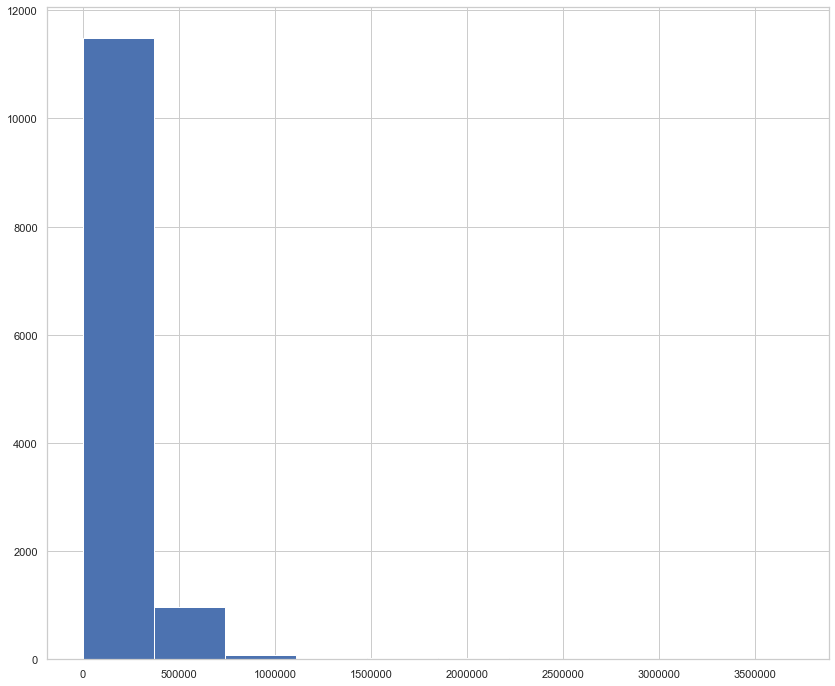

In [143]:
df[(df['object_type'] == 'menziller') & (df['city'] == 'baki')]['price_cleaned'].hist()

In [144]:
df[(df['object_type'] == 'menziller') & (df['city'] == 'baki') & (df['price_cleaned'] > 850000)]

,location,city,object_type,bill_num,mortgage_num,price_cleaned,rooms_cleaned_num,size_cleaned_num,floor_current_num,floor_max_num,floor_ratio
25,Yasamal r.,baki,menziller,1,1,1179000,5.00,302.00,16.00,22.00,0.73
26,Şah İsmayıl Xətai m.,baki,menziller,1,0,900000,6.00,300.00,17.00,18.00,0.94
593,Nərimanov r.,baki,menziller,1,0,1500000,15.00,1000.00,18.00,18.00,1.00
605,Nəsimi r.,baki,menziller,1,0,1200000,5.00,400.00,18.00,18.00,1.00
1836,Nəsimi r.,baki,menziller,1,0,2100000,4.00,281.00,22.00,32.00,0.69
...,...,...,...,...,...,...,...,...,...,...,...
48016,Şah İsmayıl Xətai m.,baki,menziller,1,0,2400000,10.00,1200.00,25.00,28.00,0.89
48519,Nəriman Nərimanov m.,baki,menziller,1,0,1500000,15.00,1000.00,18.00,19.00,0.95
48931,Nəsimi r.,baki,menziller,1,0,2200000,5.00,196.00,18.00,27.00,0.67
49189,Yasamal r.,baki,menziller,1,0,1399000,7.00,402.00,4.00,20.00,0.20
